In [2]:
import time
import tracemalloc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from itertools import permutations
import random
import os #ignore - used for debugging
import sys #ignore - used for debugging
import math

In [3]:
def set_seed(seed_value):
    '''
    set seed value to reproduce the results
    input: seed_value
    '''
    np.random.seed(seed_value)

In [4]:
def create_board_randomly(n):
    '''
    creating a board randomnly of dimensions nxn
    placing each queen in a column
    input: n - dimensions (for our assignment - we can set it as 8)
    '''
    return(np.random.randint(0,n,n))

In [5]:
def combination(n):
    return math.comb(n,2)

In [6]:
def print_board(board):
    '''
    print the board (might be helpful for debugging or for the report)
    '''
    n = len(board)
    display = np.zeros([n,n])
    # making alternate white and black rows and columns -  (odd row, even col and even row, odd col)
    display[1::2, ::2] = 1
    display[::2, 1::2] = 1
    fig, ax = plt.subplots()
    cols = ['white', 'gray']
    cmap = colors.ListedColormap(cols)
    ax.imshow(display, cmap=cmap, norm=colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(n):
        if board[i] is not None:  # Only place queen if position is not None
            plt.text(i, board[i], u"\u265B", fontsize=48, ha='center', va='center')
    plt.show()
    print(f'Queens [L-r] at rows: {board}')
    print(f'attacks: {attacks(board)}')


In [7]:
def attacks(board):
    '''
    calculating the attacks on the queen
    actually there is no need to explicitly track conflicts in the columns - it would be redundant
    this is because we ensure that only one queen occupies every column
    input: we give the board configuration here
    '''
    n = len(board)
    '''
    keeps track of the queens along rows and 2 diagonals (main and secondary)
    '''
    row_count, diagmain_count, diagsecond_count = [0] * n , [0] * 2 * n, [0] * 2 * n
    for i in range(n): #i is every column on the board
        row_count[board[i]] += 1 #board[i] - gives you the row at which the queen is placed at column i
        diagmain_count[i + board[i]] += 1 # sets bound for the diagonal count
        diagsecond_count[i - board[i] + n] += 1 # same as above
    attacks = row_count + diagmain_count + diagsecond_count
    return sum(map(combination, attacks))

BFS:

Found 92 solutions.
Solution 1:


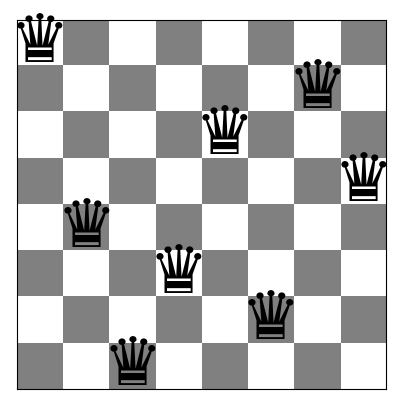

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .

----------------
Solution 2:


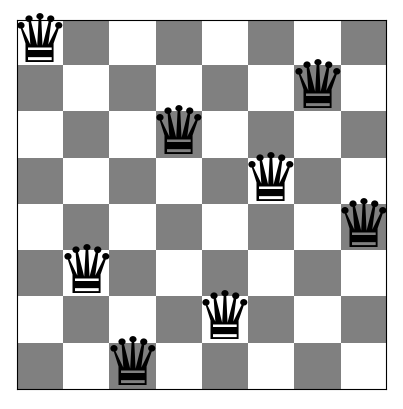

Queens [L-r] at rows: [0, 5, 7, 2, 6, 3, 1, 4]
Q . . . . . . .
. . . . . Q . .
. . . . . . . Q
. . Q . . . . .
. . . . . . Q .
. . . Q . . . .
. Q . . . . . .
. . . . Q . . .

----------------
Solution 3:


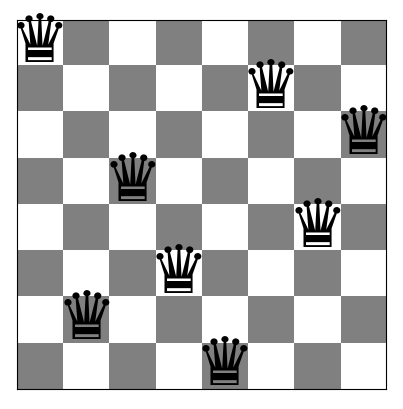

Queens [L-r] at rows: [0, 6, 3, 5, 7, 1, 4, 2]
Q . . . . . . .
. . . . . . Q .
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .
. . Q . . . . .

----------------
Solution 4:


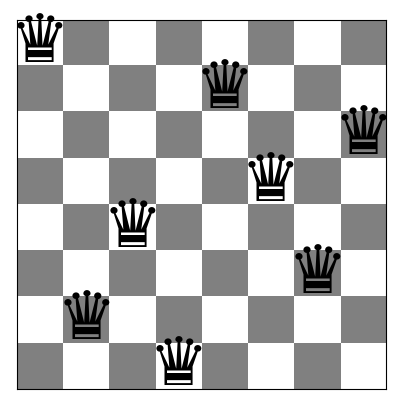

Queens [L-r] at rows: [0, 6, 4, 7, 1, 3, 5, 2]
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
. . . . . Q . .
. . Q . . . . .

----------------
Solution 5:


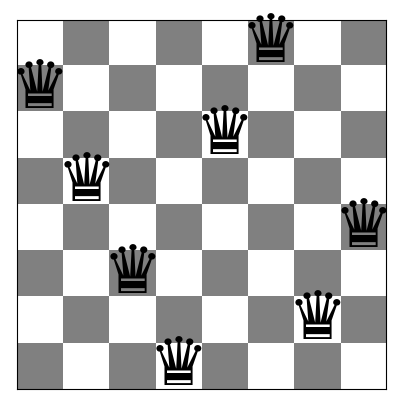

Queens [L-r] at rows: [1, 3, 5, 7, 2, 0, 6, 4]
. Q . . . . . .
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .

----------------
Solution 6:


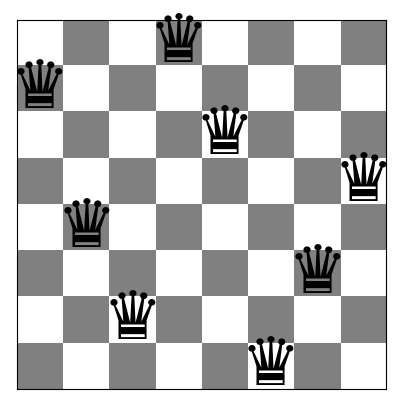

Queens [L-r] at rows: [1, 4, 6, 0, 2, 7, 5, 3]
. Q . . . . . .
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . . . . Q
. . . . . Q . .
. . . Q . . . .

----------------
Solution 7:


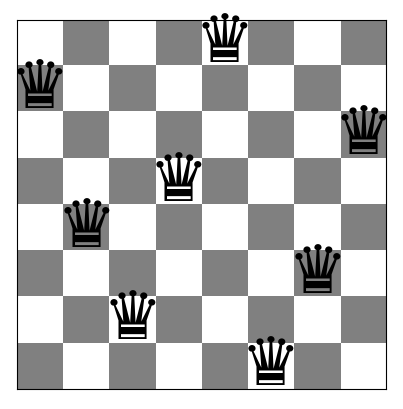

Queens [L-r] at rows: [1, 4, 6, 3, 0, 7, 5, 2]
. Q . . . . . .
. . . . Q . . .
. . . . . . Q .
. . . Q . . . .
Q . . . . . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .

----------------
Solution 8:


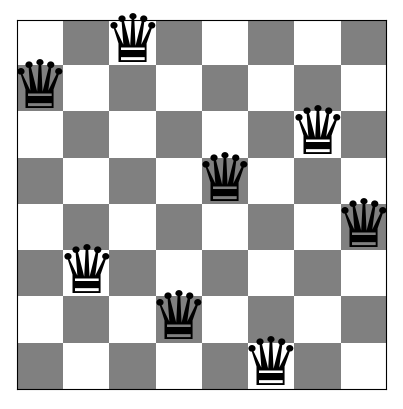

Queens [L-r] at rows: [1, 5, 0, 6, 3, 7, 2, 4]
. Q . . . . . .
. . . . . Q . .
Q . . . . . . .
. . . . . . Q .
. . . Q . . . .
. . . . . . . Q
. . Q . . . . .
. . . . Q . . .

----------------
Solution 9:


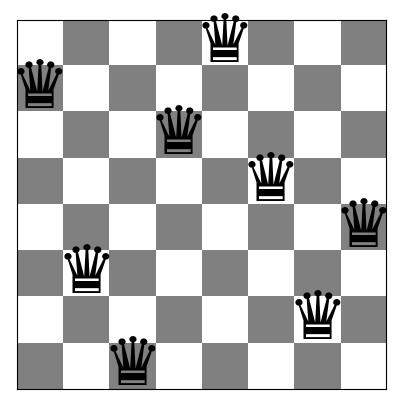

Queens [L-r] at rows: [1, 5, 7, 2, 0, 3, 6, 4]
. Q . . . . . .
. . . . . Q . .
. . . . . . . Q
. . Q . . . . .
Q . . . . . . .
. . . Q . . . .
. . . . . . Q .
. . . . Q . . .

----------------
Solution 10:


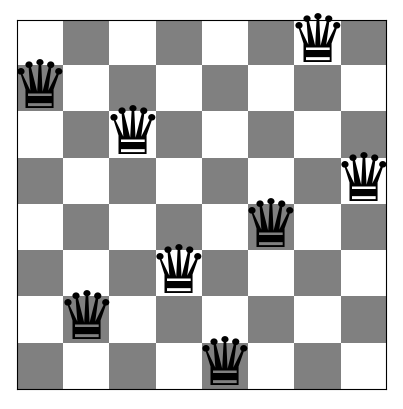

Queens [L-r] at rows: [1, 6, 2, 5, 7, 4, 0, 3]
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
. . . . Q . . .
Q . . . . . . .
. . . Q . . . .

----------------
Solution 11:


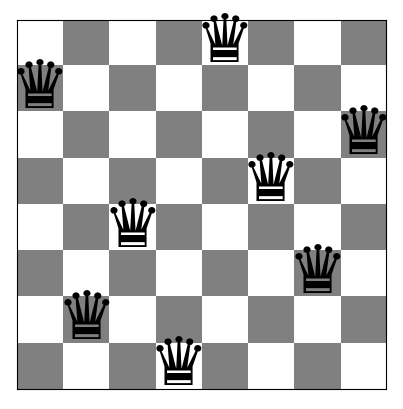

Queens [L-r] at rows: [1, 6, 4, 7, 0, 3, 5, 2]
. Q . . . . . .
. . . . . . Q .
. . . . Q . . .
. . . . . . . Q
Q . . . . . . .
. . . Q . . . .
. . . . . Q . .
. . Q . . . . .

----------------
Solution 12:


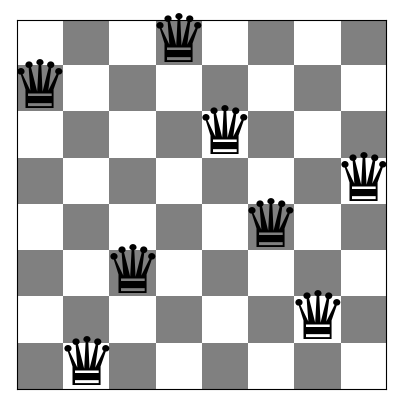

Queens [L-r] at rows: [1, 7, 5, 0, 2, 4, 6, 3]
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
Q . . . . . . .
. . Q . . . . .
. . . . Q . . .
. . . . . . Q .
. . . Q . . . .

----------------
Solution 13:


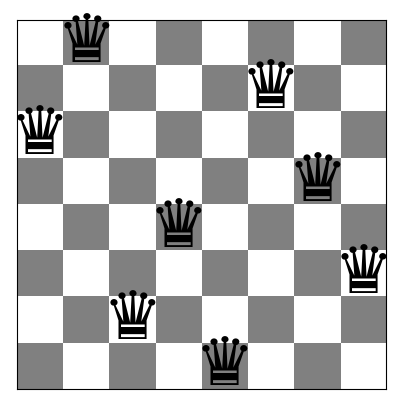

Queens [L-r] at rows: [2, 0, 6, 4, 7, 1, 3, 5]
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
. . . . . Q . .

----------------
Solution 14:


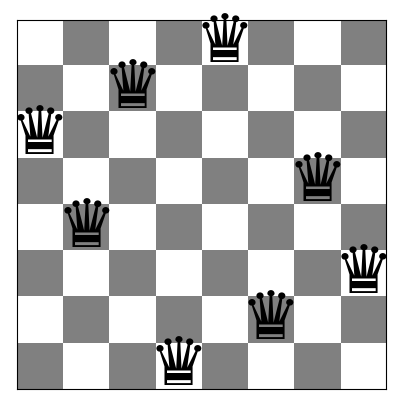

Queens [L-r] at rows: [2, 4, 1, 7, 0, 6, 3, 5]
. . Q . . . . .
. . . . Q . . .
. Q . . . . . .
. . . . . . . Q
Q . . . . . . .
. . . . . . Q .
. . . Q . . . .
. . . . . Q . .

----------------
Solution 15:


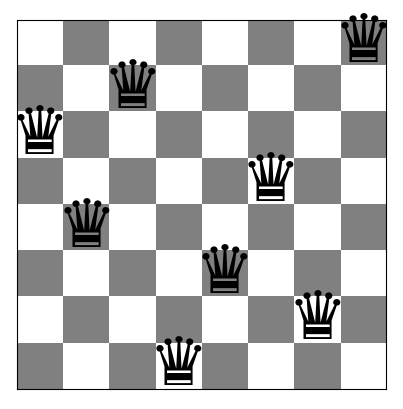

Queens [L-r] at rows: [2, 4, 1, 7, 5, 3, 6, 0]
. . Q . . . . .
. . . . Q . . .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
. . . Q . . . .
. . . . . . Q .
Q . . . . . . .

----------------
Solution 16:


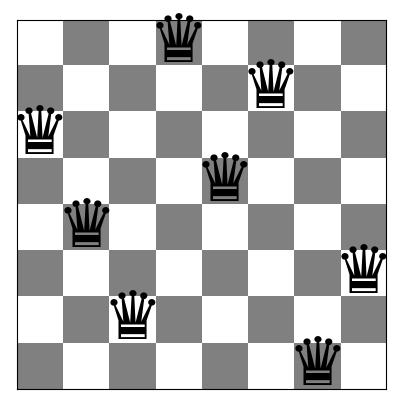

Queens [L-r] at rows: [2, 4, 6, 0, 3, 1, 7, 5]
. . Q . . . . .
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .

----------------
Solution 17:


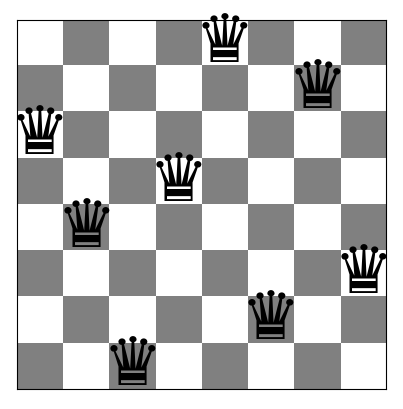

Queens [L-r] at rows: [2, 4, 7, 3, 0, 6, 1, 5]
. . Q . . . . .
. . . . Q . . .
. . . . . . . Q
. . . Q . . . .
Q . . . . . . .
. . . . . . Q .
. Q . . . . . .
. . . . . Q . .

----------------
Solution 18:


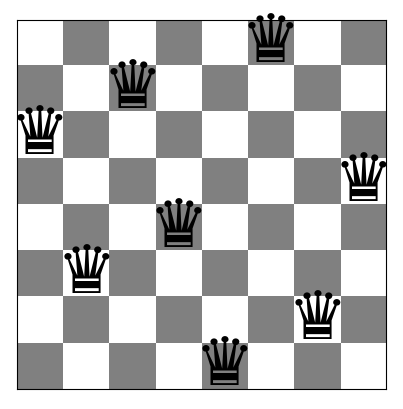

Queens [L-r] at rows: [2, 5, 1, 4, 7, 0, 6, 3]
. . Q . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . Q . . .
. . . . . . . Q
Q . . . . . . .
. . . . . . Q .
. . . Q . . . .

----------------
Solution 19:


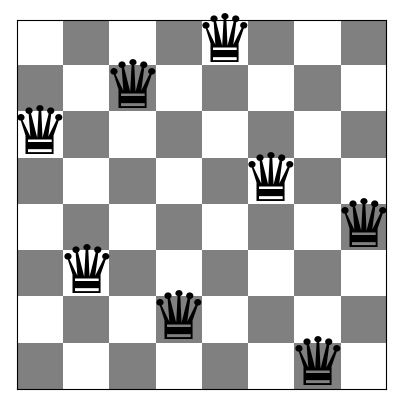

Queens [L-r] at rows: [2, 5, 1, 6, 0, 3, 7, 4]
. . Q . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . . . Q .
Q . . . . . . .
. . . Q . . . .
. . . . . . . Q
. . . . Q . . .

----------------
Solution 20:


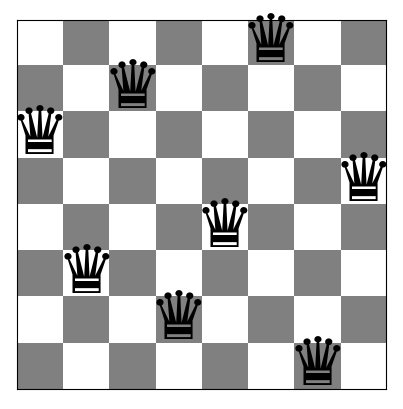

Queens [L-r] at rows: [2, 5, 1, 6, 4, 0, 7, 3]
. . Q . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . . . Q .
. . . . Q . . .
Q . . . . . . .
. . . . . . . Q
. . . Q . . . .

----------------
Solution 21:


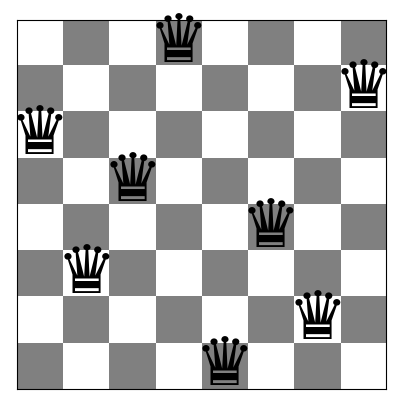

Queens [L-r] at rows: [2, 5, 3, 0, 7, 4, 6, 1]
. . Q . . . . .
. . . . . Q . .
. . . Q . . . .
Q . . . . . . .
. . . . . . . Q
. . . . Q . . .
. . . . . . Q .
. Q . . . . . .

----------------
Solution 22:


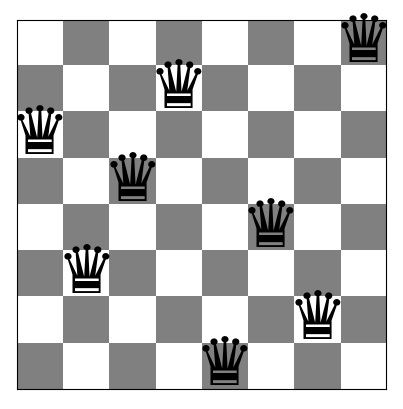

Queens [L-r] at rows: [2, 5, 3, 1, 7, 4, 6, 0]
. . Q . . . . .
. . . . . Q . .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .

----------------
Solution 23:


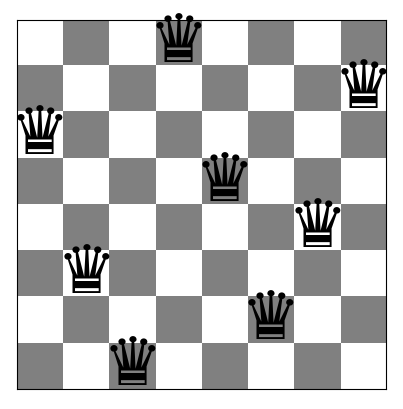

Queens [L-r] at rows: [2, 5, 7, 0, 3, 6, 4, 1]
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
Q . . . . . . .
. . . Q . . . .
. . . . . . Q .
. . . . Q . . .
. Q . . . . . .

----------------
Solution 24:


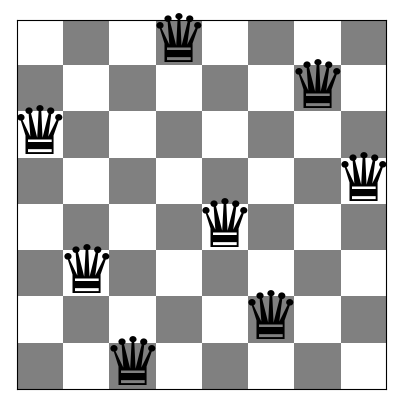

Queens [L-r] at rows: [2, 5, 7, 0, 4, 6, 1, 3]
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
Q . . . . . . .
. . . . Q . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .

----------------
Solution 25:


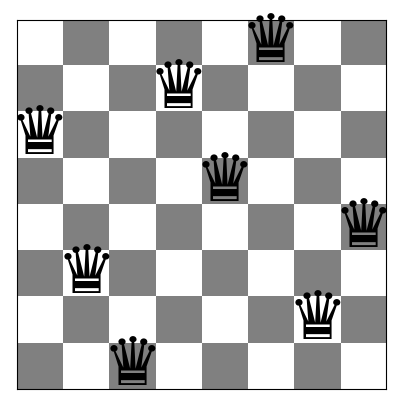

Queens [L-r] at rows: [2, 5, 7, 1, 3, 0, 6, 4]
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .

----------------
Solution 26:


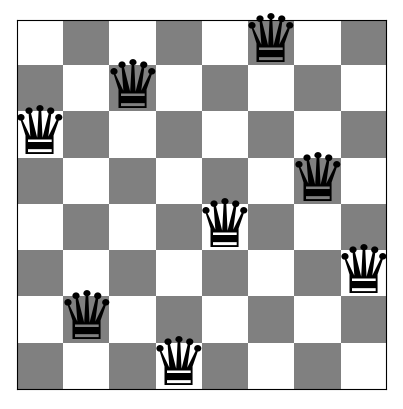

Queens [L-r] at rows: [2, 6, 1, 7, 4, 0, 3, 5]
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . . . . . Q
. . . . Q . . .
Q . . . . . . .
. . . Q . . . .
. . . . . Q . .

----------------
Solution 27:


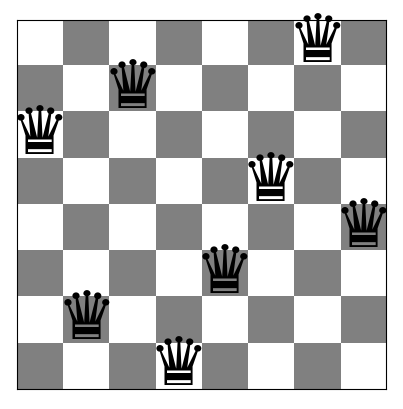

Queens [L-r] at rows: [2, 6, 1, 7, 5, 3, 0, 4]
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
. . . Q . . . .
Q . . . . . . .
. . . . Q . . .

----------------
Solution 28:


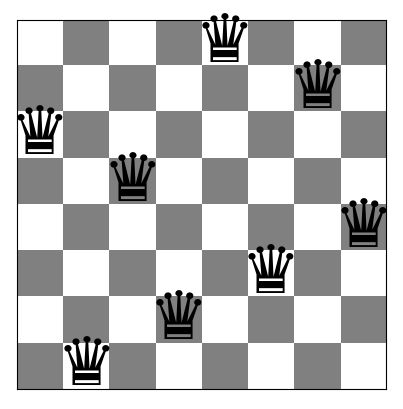

Queens [L-r] at rows: [2, 7, 3, 6, 0, 5, 1, 4]
. . Q . . . . .
. . . . . . . Q
. . . Q . . . .
. . . . . . Q .
Q . . . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . Q . . .

----------------
Solution 29:


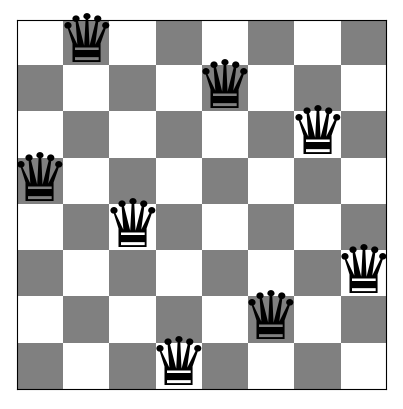

Queens [L-r] at rows: [3, 0, 4, 7, 1, 6, 2, 5]
. . . Q . . . .
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 30:


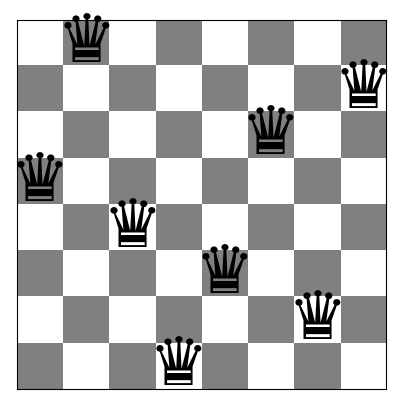

Queens [L-r] at rows: [3, 0, 4, 7, 5, 2, 6, 1]
. . . Q . . . .
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .

----------------
Solution 31:


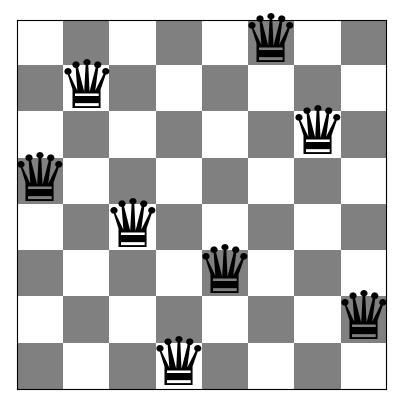

Queens [L-r] at rows: [3, 1, 4, 7, 5, 0, 2, 6]
. . . Q . . . .
. Q . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
Q . . . . . . .
. . Q . . . . .
. . . . . . Q .

----------------
Solution 32:


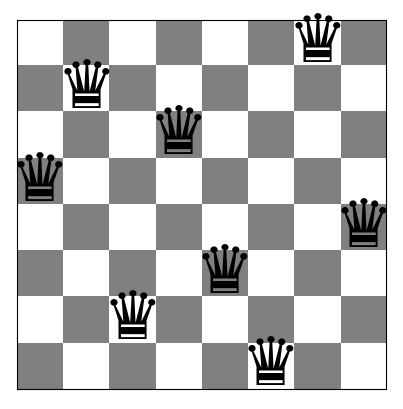

Queens [L-r] at rows: [3, 1, 6, 2, 5, 7, 0, 4]
. . . Q . . . .
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
Q . . . . . . .
. . . . Q . . .

----------------
Solution 33:


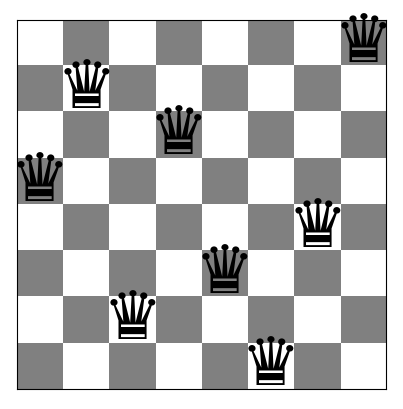

Queens [L-r] at rows: [3, 1, 6, 2, 5, 7, 4, 0]
. . . Q . . . .
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
. . . . Q . . .
Q . . . . . . .

----------------
Solution 34:


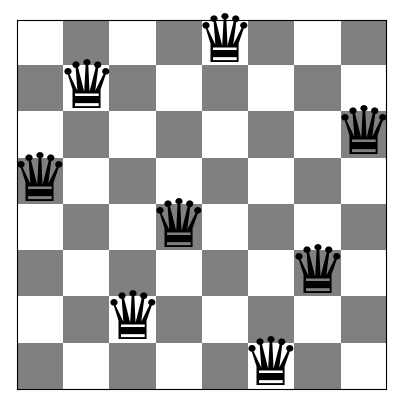

Queens [L-r] at rows: [3, 1, 6, 4, 0, 7, 5, 2]
. . . Q . . . .
. Q . . . . . .
. . . . . . Q .
. . . . Q . . .
Q . . . . . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .

----------------
Solution 35:


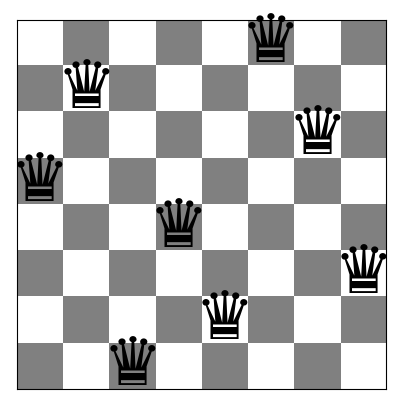

Queens [L-r] at rows: [3, 1, 7, 4, 6, 0, 2, 5]
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 36:


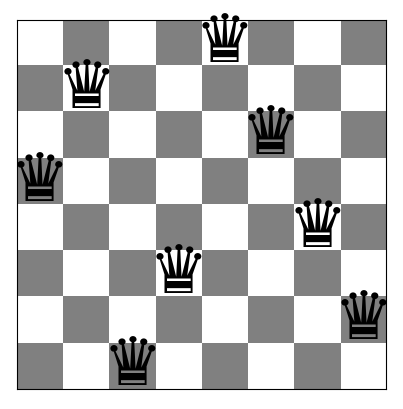

Queens [L-r] at rows: [3, 1, 7, 5, 0, 2, 4, 6]
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
Q . . . . . . .
. . Q . . . . .
. . . . Q . . .
. . . . . . Q .

----------------
Solution 37:


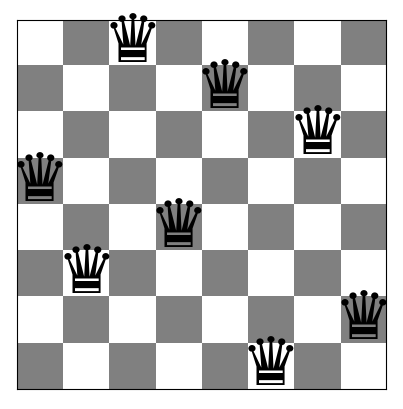

Queens [L-r] at rows: [3, 5, 0, 4, 1, 7, 2, 6]
. . . Q . . . .
. . . . . Q . .
Q . . . . . . .
. . . . Q . . .
. Q . . . . . .
. . . . . . . Q
. . Q . . . . .
. . . . . . Q .

----------------
Solution 38:


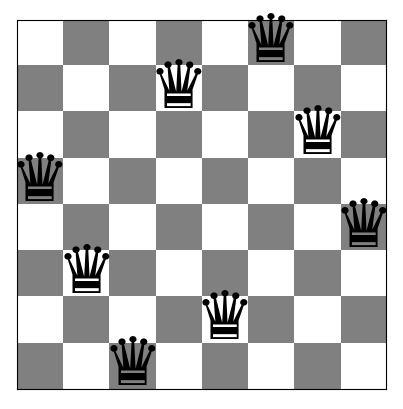

Queens [L-r] at rows: [3, 5, 7, 1, 6, 0, 2, 4]
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . Q . . .

----------------
Solution 39:


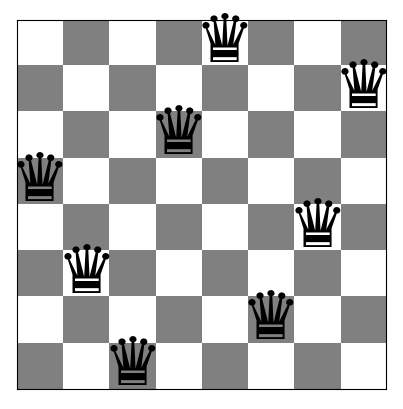

Queens [L-r] at rows: [3, 5, 7, 2, 0, 6, 4, 1]
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. Q . . . . . .

----------------
Solution 40:


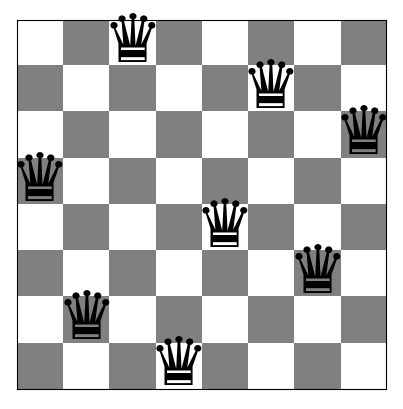

Queens [L-r] at rows: [3, 6, 0, 7, 4, 1, 5, 2]
. . . Q . . . .
. . . . . . Q .
Q . . . . . . .
. . . . . . . Q
. . . . Q . . .
. Q . . . . . .
. . . . . Q . .
. . Q . . . . .

----------------
Solution 41:


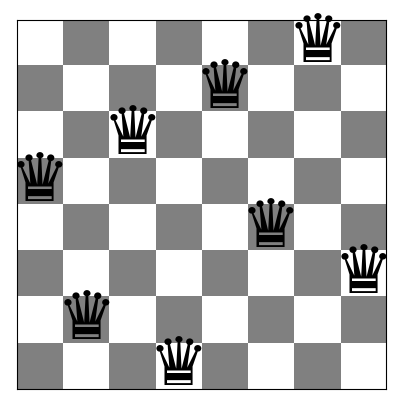

Queens [L-r] at rows: [3, 6, 2, 7, 1, 4, 0, 5]
. . . Q . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .
Q . . . . . . .
. . . . . Q . .

----------------
Solution 42:


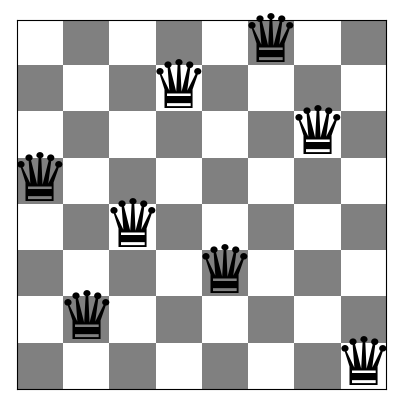

Queens [L-r] at rows: [3, 6, 4, 1, 5, 0, 2, 7]
. . . Q . . . .
. . . . . . Q .
. . . . Q . . .
. Q . . . . . .
. . . . . Q . .
Q . . . . . . .
. . Q . . . . .
. . . . . . . Q

----------------
Solution 43:


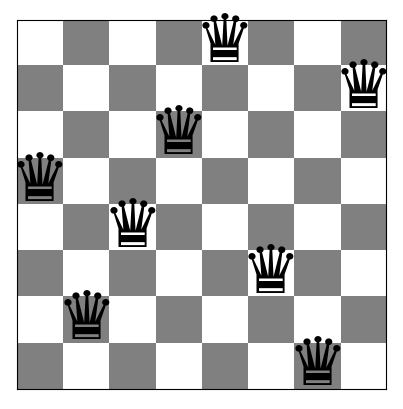

Queens [L-r] at rows: [3, 6, 4, 2, 0, 5, 7, 1]
. . . Q . . . .
. . . . . . Q .
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .

----------------
Solution 44:


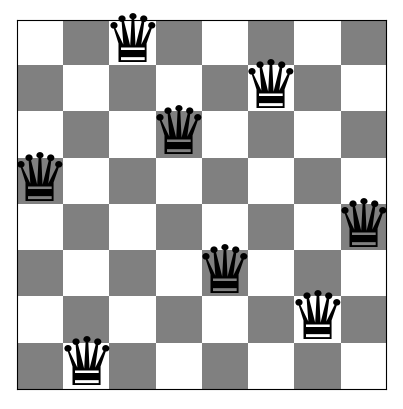

Queens [L-r] at rows: [3, 7, 0, 2, 5, 1, 6, 4]
. . . Q . . . .
. . . . . . . Q
Q . . . . . . .
. . Q . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . . . Q .
. . . . Q . . .

----------------
Solution 45:


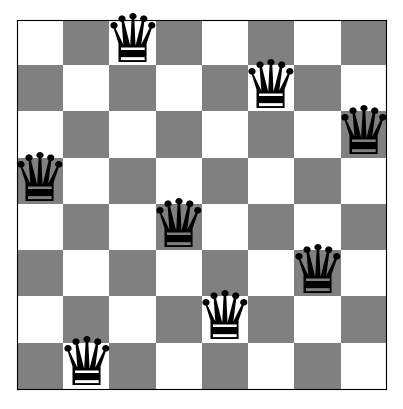

Queens [L-r] at rows: [3, 7, 0, 4, 6, 1, 5, 2]
. . . Q . . . .
. . . . . . . Q
Q . . . . . . .
. . . . Q . . .
. . . . . . Q .
. Q . . . . . .
. . . . . Q . .
. . Q . . . . .

----------------
Solution 46:


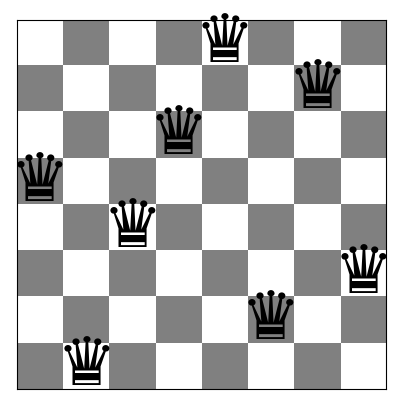

Queens [L-r] at rows: [3, 7, 4, 2, 0, 6, 1, 5]
. . . Q . . . .
. . . . . . . Q
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. Q . . . . . .
. . . . . Q . .

----------------
Solution 47:


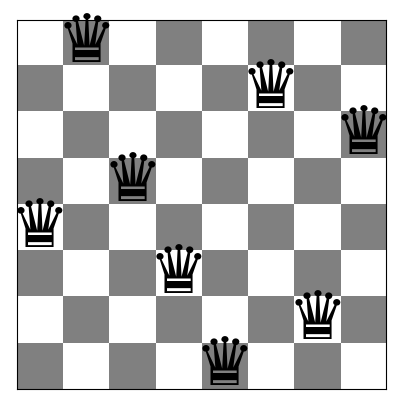

Queens [L-r] at rows: [4, 0, 3, 5, 7, 1, 6, 2]
. . . . Q . . .
Q . . . . . . .
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .

----------------
Solution 48:


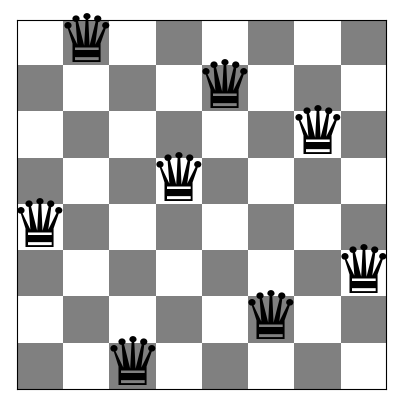

Queens [L-r] at rows: [4, 0, 7, 3, 1, 6, 2, 5]
. . . . Q . . .
Q . . . . . . .
. . . . . . . Q
. . . Q . . . .
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 49:


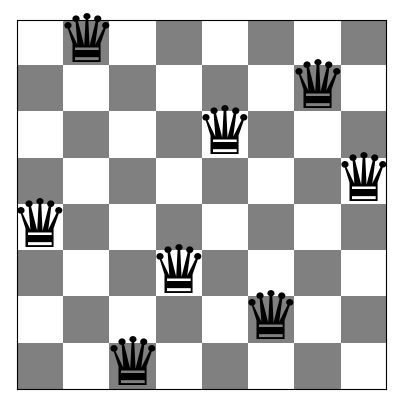

Queens [L-r] at rows: [4, 0, 7, 5, 2, 6, 1, 3]
. . . . Q . . .
Q . . . . . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .

----------------
Solution 50:


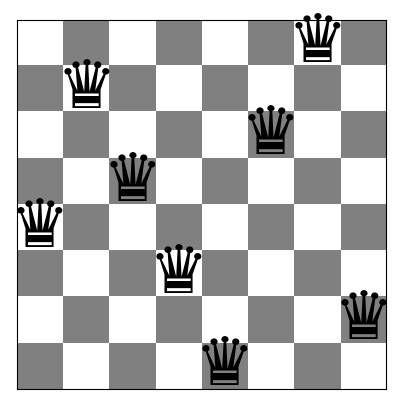

Queens [L-r] at rows: [4, 1, 3, 5, 7, 2, 0, 6]
. . . . Q . . .
. Q . . . . . .
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .

----------------
Solution 51:


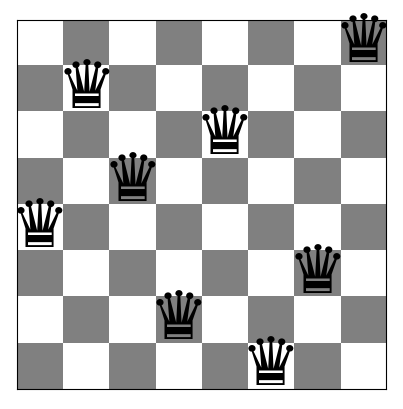

Queens [L-r] at rows: [4, 1, 3, 6, 2, 7, 5, 0]
. . . . Q . . .
. Q . . . . . .
. . . Q . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . . . Q
. . . . . Q . .
Q . . . . . . .

----------------
Solution 52:


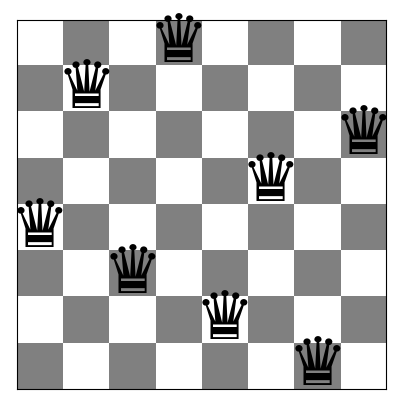

Queens [L-r] at rows: [4, 1, 5, 0, 6, 3, 7, 2]
. . . . Q . . .
. Q . . . . . .
. . . . . Q . .
Q . . . . . . .
. . . . . . Q .
. . . Q . . . .
. . . . . . . Q
. . Q . . . . .

----------------
Solution 53:


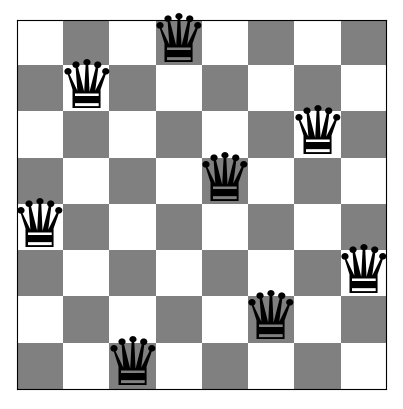

Queens [L-r] at rows: [4, 1, 7, 0, 3, 6, 2, 5]
. . . . Q . . .
. Q . . . . . .
. . . . . . . Q
Q . . . . . . .
. . . Q . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 54:


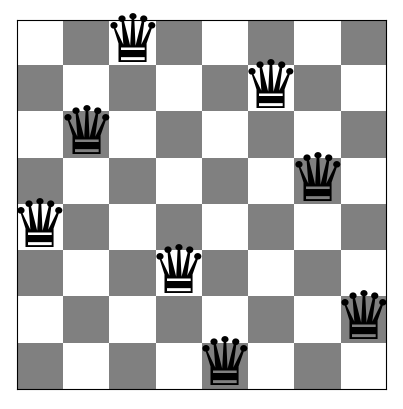

Queens [L-r] at rows: [4, 2, 0, 5, 7, 1, 3, 6]
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
. . . . . . Q .

----------------
Solution 55:


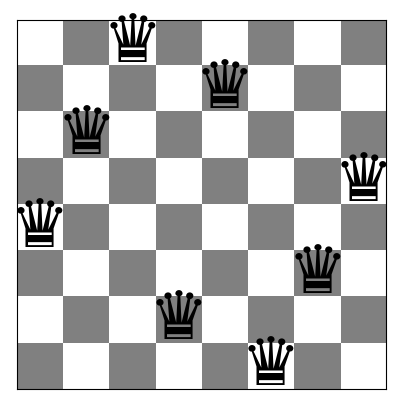

Queens [L-r] at rows: [4, 2, 0, 6, 1, 7, 5, 3]
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
. . . Q . . . .

----------------
Solution 56:


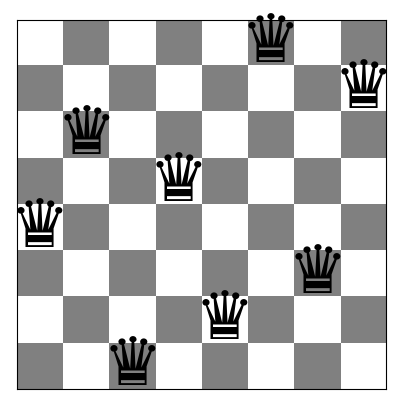

Queens [L-r] at rows: [4, 2, 7, 3, 6, 0, 5, 1]
. . . . Q . . .
. . Q . . . . .
. . . . . . . Q
. . . Q . . . .
. . . . . . Q .
Q . . . . . . .
. . . . . Q . .
. Q . . . . . .

----------------
Solution 57:


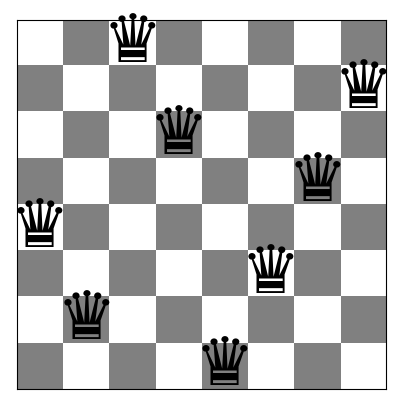

Queens [L-r] at rows: [4, 6, 0, 2, 7, 5, 3, 1]
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . . . . Q
. . . . . Q . .
. . . Q . . . .
. Q . . . . . .

----------------
Solution 58:


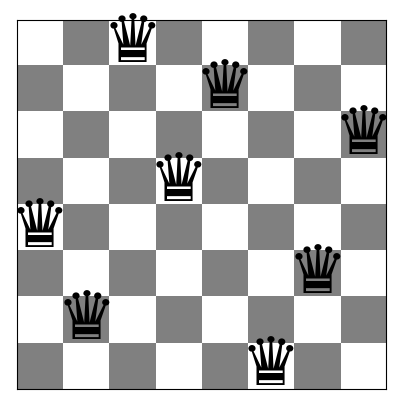

Queens [L-r] at rows: [4, 6, 0, 3, 1, 7, 5, 2]
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .

----------------
Solution 59:


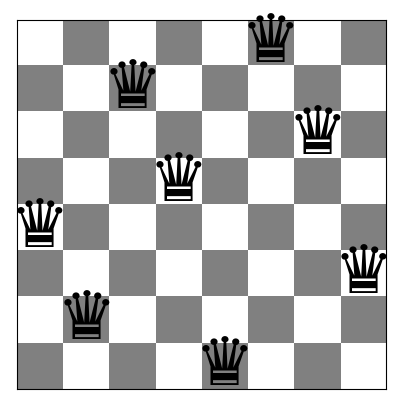

Queens [L-r] at rows: [4, 6, 1, 3, 7, 0, 2, 5]
. . . . Q . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .
. . . . . . . Q
Q . . . . . . .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 60:


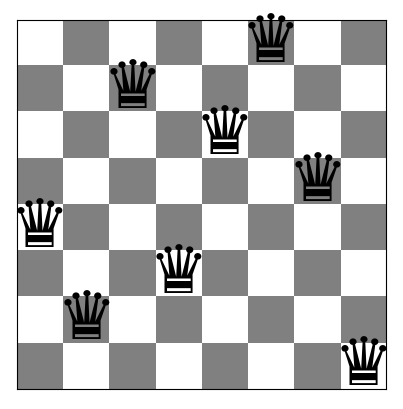

Queens [L-r] at rows: [4, 6, 1, 5, 2, 0, 3, 7]
. . . . Q . . .
. . . . . . Q .
. Q . . . . . .
. . . . . Q . .
. . Q . . . . .
Q . . . . . . .
. . . Q . . . .
. . . . . . . Q

----------------
Solution 61:


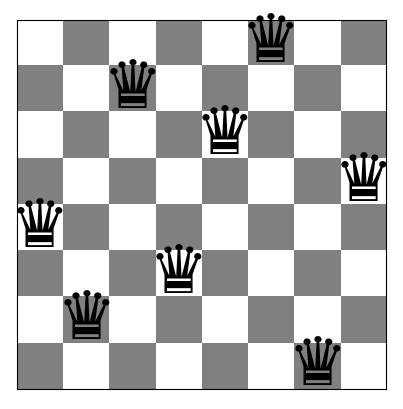

Queens [L-r] at rows: [4, 6, 1, 5, 2, 0, 7, 3]
. . . . Q . . .
. . . . . . Q .
. Q . . . . . .
. . . . . Q . .
. . Q . . . . .
Q . . . . . . .
. . . . . . . Q
. . . Q . . . .

----------------
Solution 62:


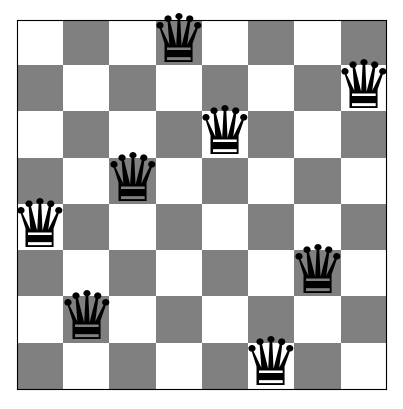

Queens [L-r] at rows: [4, 6, 3, 0, 2, 7, 5, 1]
. . . . Q . . .
. . . . . . Q .
. . . Q . . . .
Q . . . . . . .
. . Q . . . . .
. . . . . . . Q
. . . . . Q . .
. Q . . . . . .

----------------
Solution 63:


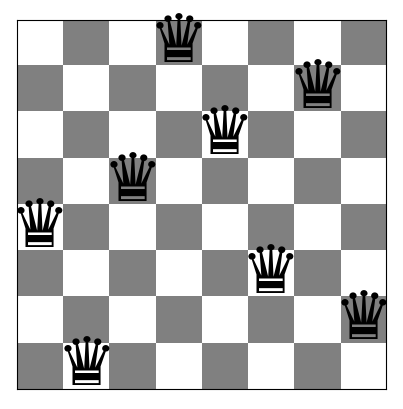

Queens [L-r] at rows: [4, 7, 3, 0, 2, 5, 1, 6]
. . . . Q . . .
. . . . . . . Q
. . . Q . . . .
Q . . . . . . .
. . Q . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . . . Q .

----------------
Solution 64:


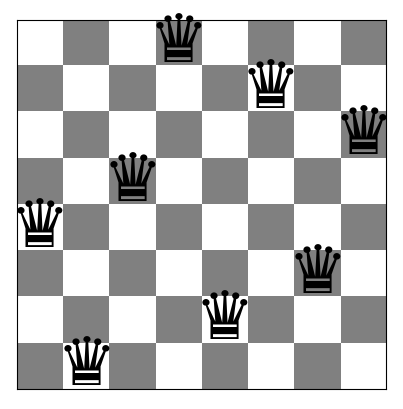

Queens [L-r] at rows: [4, 7, 3, 0, 6, 1, 5, 2]
. . . . Q . . .
. . . . . . . Q
. . . Q . . . .
Q . . . . . . .
. . . . . . Q .
. Q . . . . . .
. . . . . Q . .
. . Q . . . . .

----------------
Solution 65:


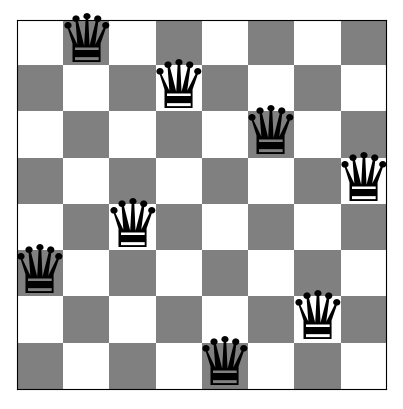

Queens [L-r] at rows: [5, 0, 4, 1, 7, 2, 6, 3]
. . . . . Q . .
Q . . . . . . .
. . . . Q . . .
. Q . . . . . .
. . . . . . . Q
. . Q . . . . .
. . . . . . Q .
. . . Q . . . .

----------------
Solution 66:


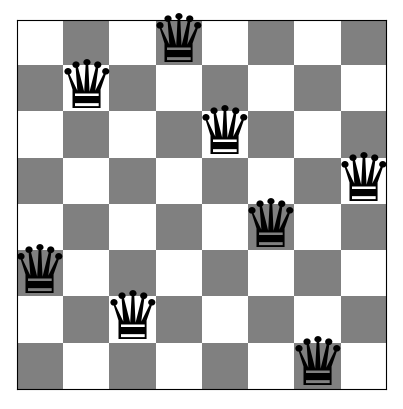

Queens [L-r] at rows: [5, 1, 6, 0, 2, 4, 7, 3]
. . . . . Q . .
. Q . . . . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . Q . . .
. . . . . . . Q
. . . Q . . . .

----------------
Solution 67:


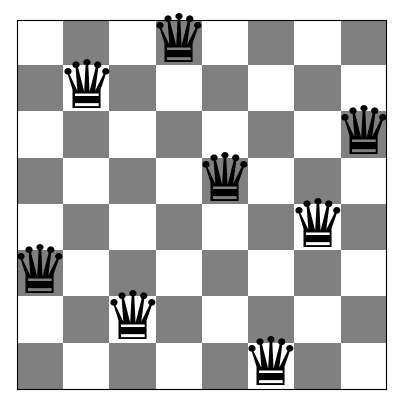

Queens [L-r] at rows: [5, 1, 6, 0, 3, 7, 4, 2]
. . . . . Q . .
. Q . . . . . .
. . . . . . Q .
Q . . . . . . .
. . . Q . . . .
. . . . . . . Q
. . . . Q . . .
. . Q . . . . .

----------------
Solution 68:


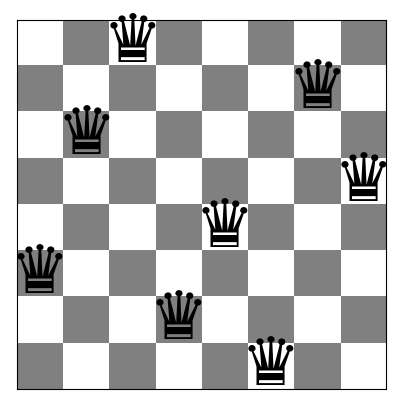

Queens [L-r] at rows: [5, 2, 0, 6, 4, 7, 1, 3]
. . . . . Q . .
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .

----------------
Solution 69:


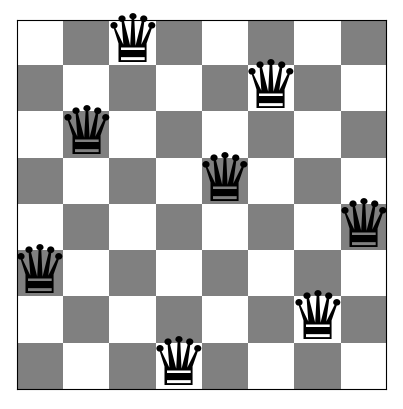

Queens [L-r] at rows: [5, 2, 0, 7, 3, 1, 6, 4]
. . . . . Q . .
. . Q . . . . .
Q . . . . . . .
. . . . . . . Q
. . . Q . . . .
. Q . . . . . .
. . . . . . Q .
. . . . Q . . .

----------------
Solution 70:


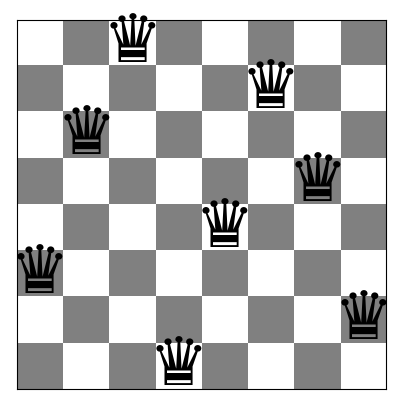

Queens [L-r] at rows: [5, 2, 0, 7, 4, 1, 3, 6]
. . . . . Q . .
. . Q . . . . .
Q . . . . . . .
. . . . . . . Q
. . . . Q . . .
. Q . . . . . .
. . . Q . . . .
. . . . . . Q .

----------------
Solution 71:


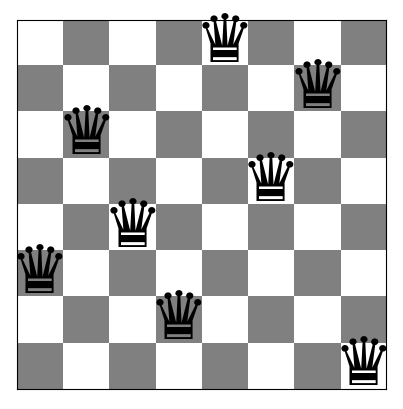

Queens [L-r] at rows: [5, 2, 4, 6, 0, 3, 1, 7]
. . . . . Q . .
. . Q . . . . .
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q

----------------
Solution 72:


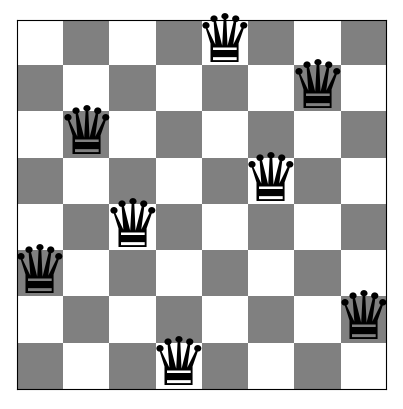

Queens [L-r] at rows: [5, 2, 4, 7, 0, 3, 1, 6]
. . . . . Q . .
. . Q . . . . .
. . . . Q . . .
. . . . . . . Q
Q . . . . . . .
. . . Q . . . .
. Q . . . . . .
. . . . . . Q .

----------------
Solution 73:


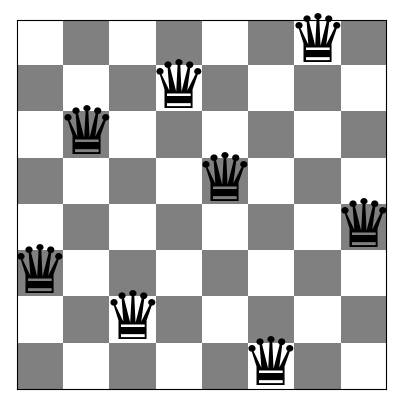

Queens [L-r] at rows: [5, 2, 6, 1, 3, 7, 0, 4]
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .
. . . . . . . Q
Q . . . . . . .
. . . . Q . . .

----------------
Solution 74:


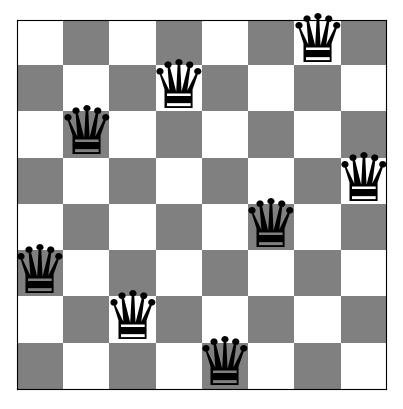

Queens [L-r] at rows: [5, 2, 6, 1, 7, 4, 0, 3]
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . . . . . Q
. . . . Q . . .
Q . . . . . . .
. . . Q . . . .

----------------
Solution 75:


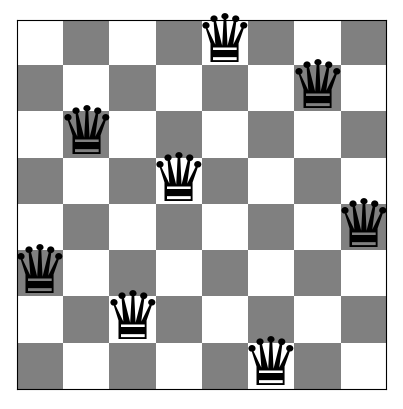

Queens [L-r] at rows: [5, 2, 6, 3, 0, 7, 1, 4]
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. . . Q . . . .
Q . . . . . . .
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .

----------------
Solution 76:


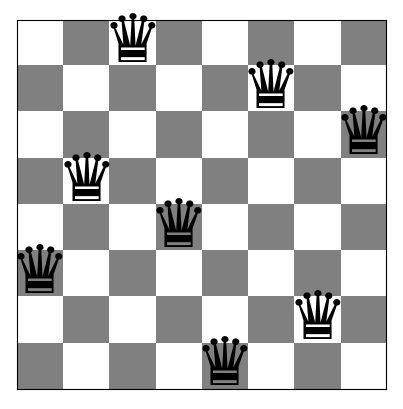

Queens [L-r] at rows: [5, 3, 0, 4, 7, 1, 6, 2]
. . . . . Q . .
. . . Q . . . .
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .

----------------
Solution 77:


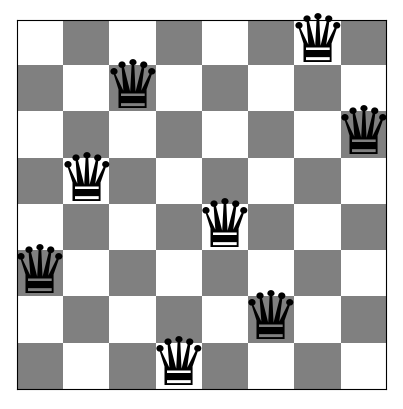

Queens [L-r] at rows: [5, 3, 1, 7, 4, 6, 0, 2]
. . . . . Q . .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .

----------------
Solution 78:


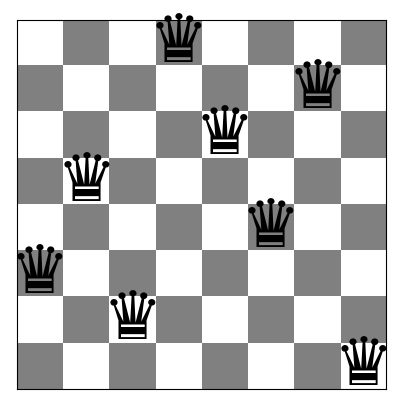

Queens [L-r] at rows: [5, 3, 6, 0, 2, 4, 1, 7]
. . . . . Q . .
. . . Q . . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . Q . . .
. Q . . . . . .
. . . . . . . Q

----------------
Solution 79:


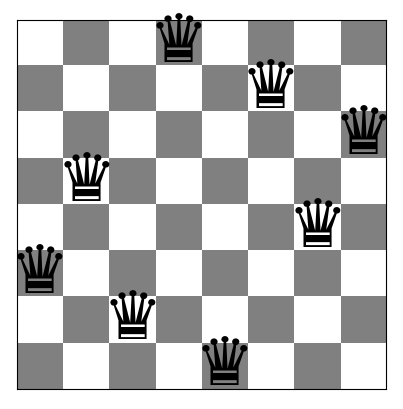

Queens [L-r] at rows: [5, 3, 6, 0, 7, 1, 4, 2]
. . . . . Q . .
. . . Q . . . .
. . . . . . Q .
Q . . . . . . .
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .
. . Q . . . . .

----------------
Solution 80:


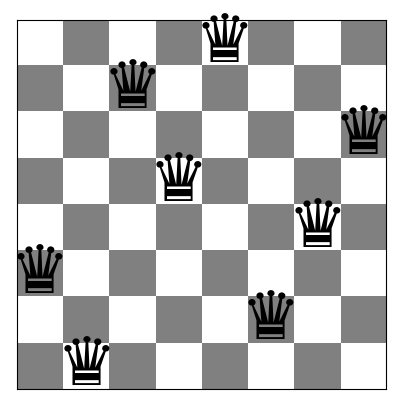

Queens [L-r] at rows: [5, 7, 1, 3, 0, 6, 4, 2]
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . Q . . . . .

----------------
Solution 81:


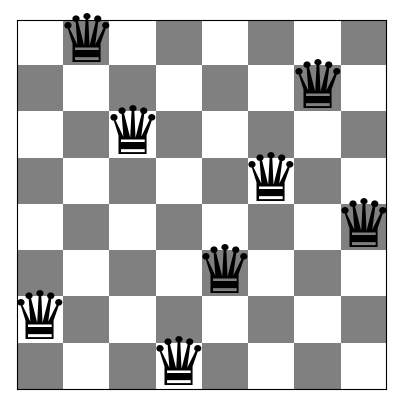

Queens [L-r] at rows: [6, 0, 2, 7, 5, 3, 1, 4]
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . . . . Q
. . . . . Q . .
. . . Q . . . .
. Q . . . . . .
. . . . Q . . .

----------------
Solution 82:


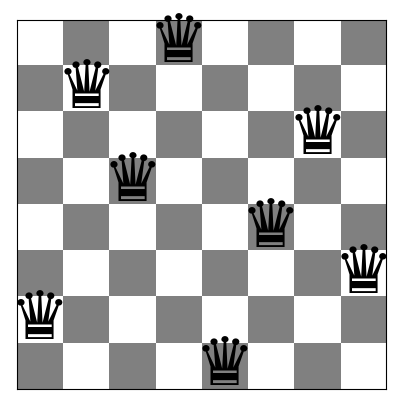

Queens [L-r] at rows: [6, 1, 3, 0, 7, 4, 2, 5]
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .
Q . . . . . . .
. . . . . . . Q
. . . . Q . . .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 83:


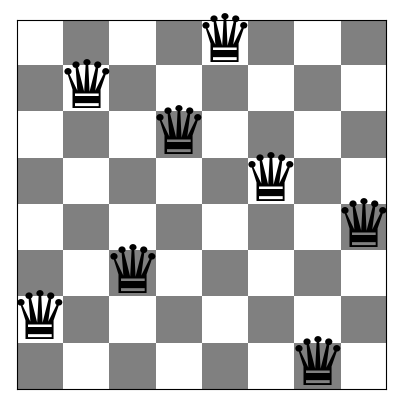

Queens [L-r] at rows: [6, 1, 5, 2, 0, 3, 7, 4]
. . . . . . Q .
. Q . . . . . .
. . . . . Q . .
. . Q . . . . .
Q . . . . . . .
. . . Q . . . .
. . . . . . . Q
. . . . Q . . .

----------------
Solution 84:


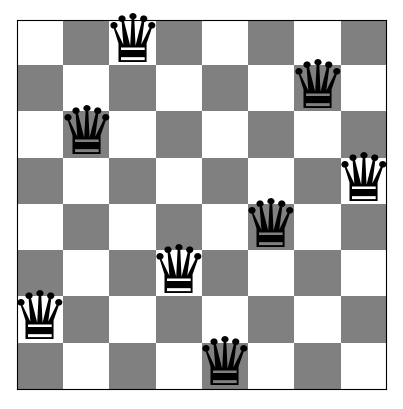

Queens [L-r] at rows: [6, 2, 0, 5, 7, 4, 1, 3]
. . . . . . Q .
. . Q . . . . .
Q . . . . . . .
. . . . . Q . .
. . . . . . . Q
. . . . Q . . .
. Q . . . . . .
. . . Q . . . .

----------------
Solution 85:


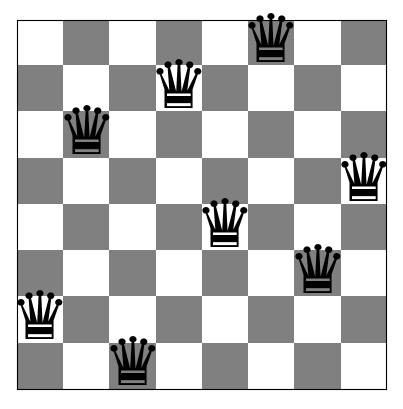

Queens [L-r] at rows: [6, 2, 7, 1, 4, 0, 5, 3]
. . . . . . Q .
. . Q . . . . .
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .
Q . . . . . . .
. . . . . Q . .
. . . Q . . . .

----------------
Solution 86:


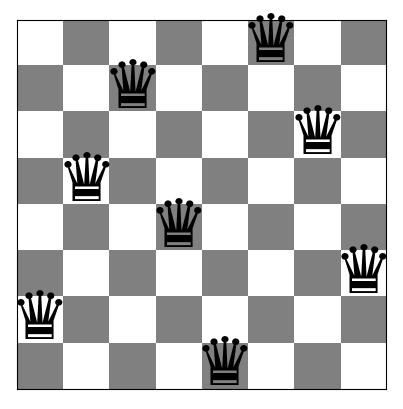

Queens [L-r] at rows: [6, 3, 1, 4, 7, 0, 2, 5]
. . . . . . Q .
. . . Q . . . .
. Q . . . . . .
. . . . Q . . .
. . . . . . . Q
Q . . . . . . .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 87:


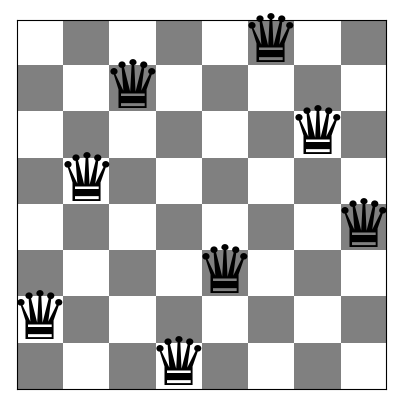

Queens [L-r] at rows: [6, 3, 1, 7, 5, 0, 2, 4]
. . . . . . Q .
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . . Q . .
Q . . . . . . .
. . Q . . . . .
. . . . Q . . .

----------------
Solution 88:


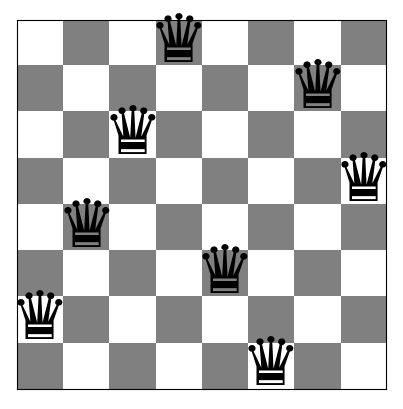

Queens [L-r] at rows: [6, 4, 2, 0, 5, 7, 1, 3]
. . . . . . Q .
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .

----------------
Solution 89:


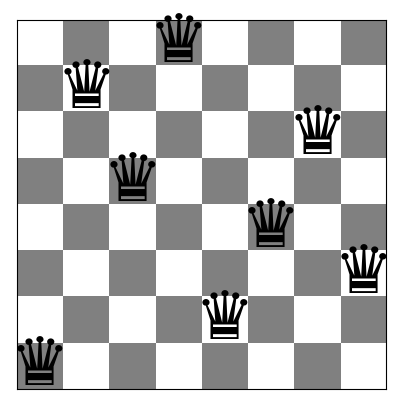

Queens [L-r] at rows: [7, 1, 3, 0, 6, 4, 2, 5]
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . Q . . . . .
. . . . . Q . .

----------------
Solution 90:


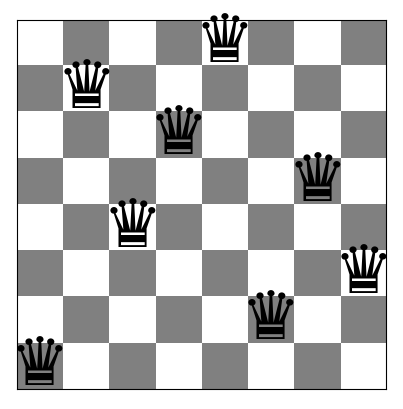

Queens [L-r] at rows: [7, 1, 4, 2, 0, 6, 3, 5]
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. . . Q . . . .
. . . . . Q . .

----------------
Solution 91:


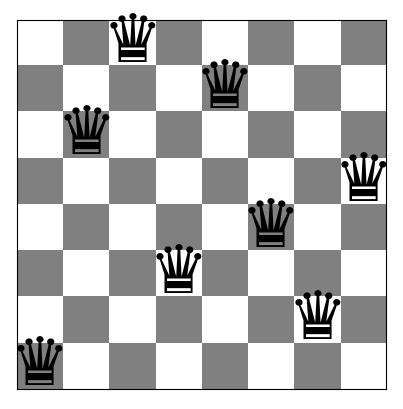

Queens [L-r] at rows: [7, 2, 0, 5, 1, 4, 6, 3]
. . . . . . . Q
. . Q . . . . .
Q . . . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . Q . . .
. . . . . . Q .
. . . Q . . . .

----------------
Solution 92:


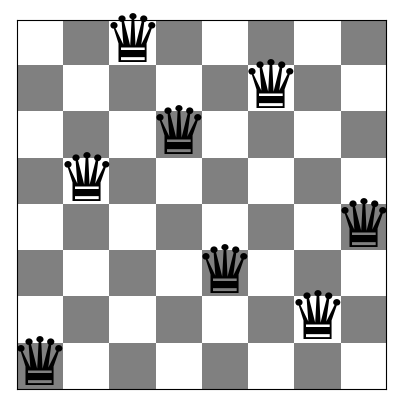

Queens [L-r] at rows: [7, 3, 0, 2, 5, 1, 6, 4]
. . . . . . . Q
. . . Q . . . .
Q . . . . . . .
. . Q . . . . .
. . . . . Q . .
. Q . . . . . .
. . . . . . Q .
. . . . Q . . .

----------------


In [ ]:
from collections import deque

def bfs_8Q():
    queue = deque([([], 0)])
    solutions = []

    while queue:
        board, row = queue.popleft()

        if row == 8:
            solutions.append(board)
            continue

        for col in range(8):
            is_valid = True
            for prev_row in range(row):
                prev_col = board[prev_row]
                if prev_col == col or abs(prev_col - col) == abs(prev_row - row):
                    is_valid = False
                    break

            if is_valid:
                new_board = board + [col]
                queue.append((new_board, row + 1))

    print(f"Found {len(solutions)} solutions.")
    for i, solution in enumerate(solutions):
        print(f"Solution {i + 1}:")
        print_board(solution)
        for row in solution:
            print(" ".join(['Q' if col == row else '.' for col in range(8)]))
        print("\n" + "-" * 16)

bfs_8Q()


In [ ]:
from collections import deque
import time

def bfs_8Q():

    queue = deque([([], 0)])
    solutions = []

    while queue:
        board, row = queue.popleft()

        if row == 8:
            solutions.append(board)
            continue

        for col in range(8):
            is_valid = True
            for prev_row in range(row):
                prev_col = board[prev_row]
                if prev_col == col or abs(prev_col - col) == abs(prev_row - row):
                    is_valid = False
                    break

            if is_valid:
                new_board = board + [col]
                queue.append((new_board, row + 1))

start_time = time.time()
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()#Taking a snapshot before solving
bfs_8Q()
snapshot2 = tracemalloc.take_snapshot()#Taking the final snapshot
tracemalloc.stop()
top_stats = snapshot2.compare_to(snapshot1,'lineno')#Calculating the memmory usage
memory = top_stats[0].size_diff / 1024
end_time = time.time()
time_taken = end_time - start_time
print(f"Found solutions in {end_time - start_time} seconds.\n")
print('Memory Usage:', memory,'KB')


Found solutions in 0.043543338775634766 seconds.

Memory Usage: 4.15625 KB


DFS:

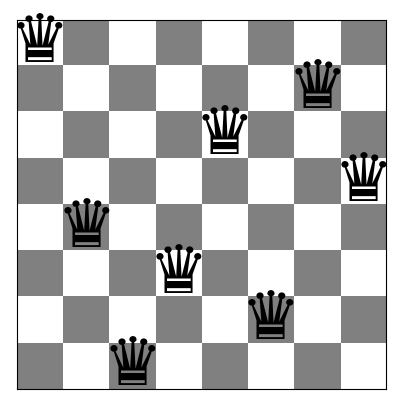

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


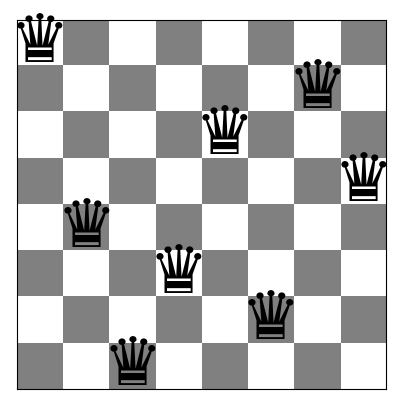

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


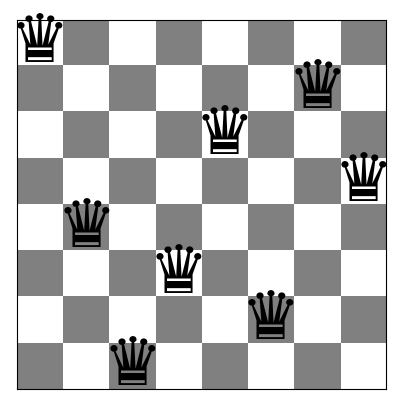

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


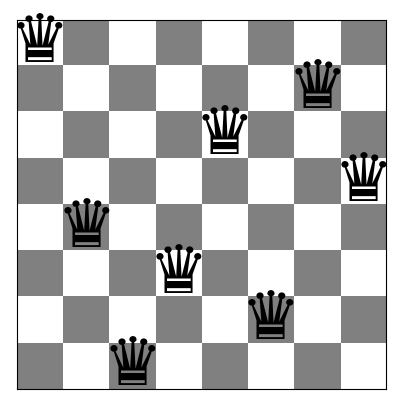

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


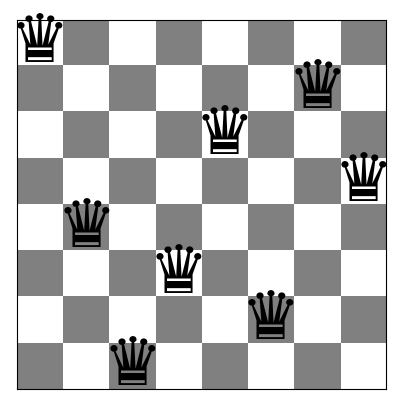

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


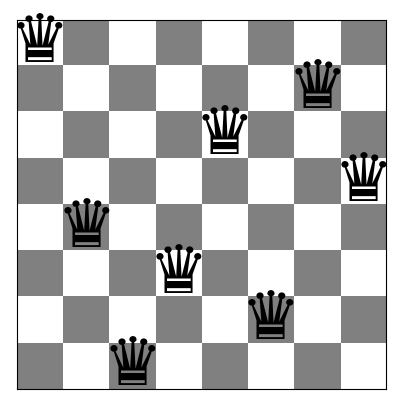

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


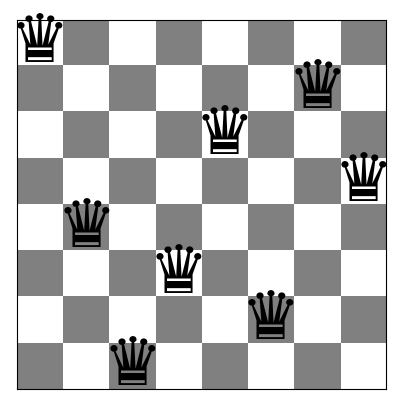

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


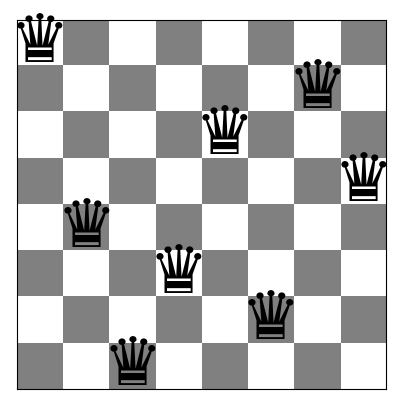

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.9276342391967773 seconds
Memory Usage: 145.2421875 KB


In [ ]:
def dfs_8Q():
    def valid(queen_positions, i, j):
        for row in range(i):
            col = queen_positions[row]
            if col == j or \
               col - row == j - i or \
               col + row == j + i:
                return False
        return True

    def place_queen(n, queen_positions, row):
        if row == n:
            for r in range(n):
                line = "".join("Q " if queen_positions[r] == c else ". " for c in range(n))
                print_board(queen_positions)
                # print(line)
            # print("\n")
            return True
        for col in range(n):
            if valid(queen_positions, row, col):
                queen_positions[row] = col
                if place_queen(n, queen_positions, row + 1):
                    return True
        return False
    start_time = time.time()
    if not place_queen(8, [-1] * 8, 0):
        print("No solution found.")
    end_time = time.time()
    print(f"Time taken to solve: {end_time - start_time} seconds")


start_time = time.time()
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()#Taking a snapshot before solving
dfs_8Q()
snapshot2 = tracemalloc.take_snapshot()#Taking the final snapshot
tracemalloc.stop()
top_stats = snapshot2.compare_to(snapshot1,'lineno')#Calculating the memmory usage
memory = top_stats[0].size_diff / 1024
print('Memory Usage:', memory,'KB')


In [ ]:
def run_experiment(vanilla_or_meta, board_size, name_function, num_runs=10):
    # '''
    # increase runs but comment print boards (you don't want overflowing output)
    # input: function - can be steepest_ascent_hill_climbing (vanilla) or random_restart_hill_climbing (meta)
    # '''
    #store values for all runs
    total_runtime, total_attacks, optimal_solutions = 0,0,0
    append_runtime, append_attacks, append_optimal_Solutions, which_iterations  = [],[],[], []
    i = 0
    average_memory =0;
    while i < num_runs:
        set_seed(i)
        board = create_board_randomly(8)
        print('#######################################################################################')
        print(f'Starting run {i+1} for {dfs_8Q}')
        # print_board(board) #comment if you find it annoying
        start_time = time.time() #record the start time
        # initial_state = [random.randint(0, 7) for _ in range(8)]  # Random initial state
        dfs_8Q() #run the function
        end_time = time.time() # end the time
        run_time = end_time - start_time #calculate the difference
        total_runtime += run_time
        # total_attacks += result_attack
        # average_memory += memory
        append_runtime.append(run_time)
        # append_attacks.append(result_attack)
        # which_iterations.append(result_iteration)
        # if result_attack == 0:
        #     optimal_solutions += 1
        #     append_optimal_Solutions.append(1)
        # else:
        #     append_optimal_Solutions.append(0)
        print(f'\nEnding {i} run')
        # print('Temperature:',result_temperature)
        print('Time:', run_time)
        # print('Memory Usage:', memory)
        print('#######################################################################################\n')
        i += 1
    avg_runtime = total_runtime / num_runs
    # avg_memory = average_memory/num_runs
    # percent_attacks = (total_attacks / num_runs) * 100
    # percent_optimal_solutions = (optimal_solutions / num_runs) * 100
    print('#######################################################################################\n\n')
    return avg_runtime, append_runtime

#######################################################################################
Starting run 1 for <function dfs_8Q at 0x7d98841e9120>


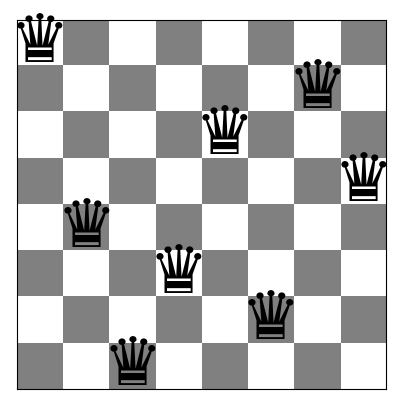

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


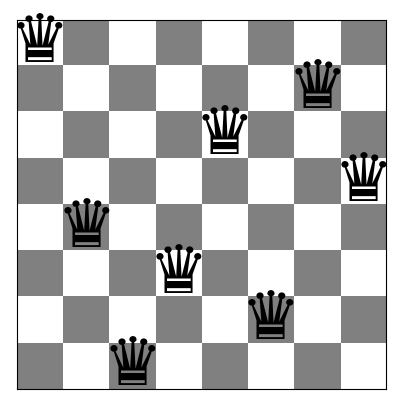

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


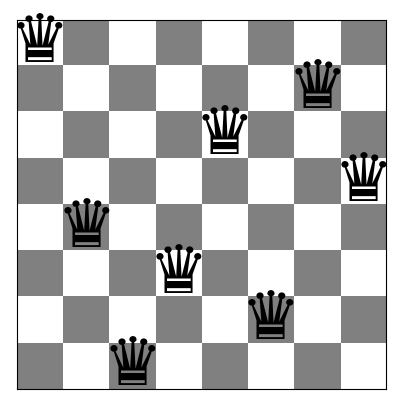

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


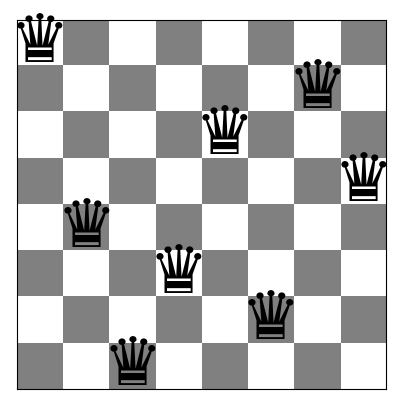

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


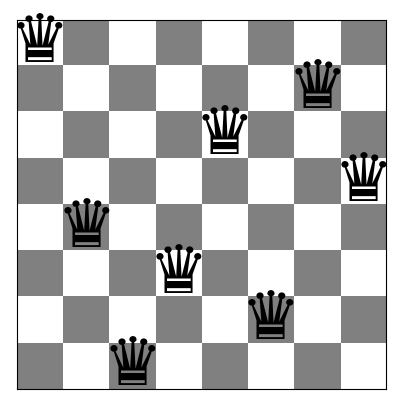

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


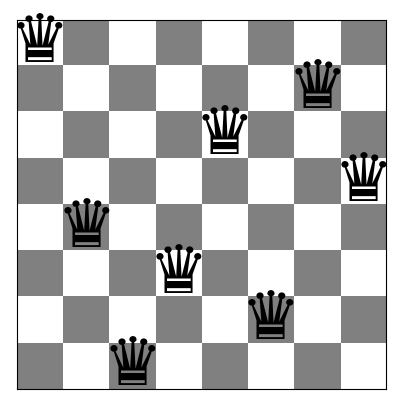

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


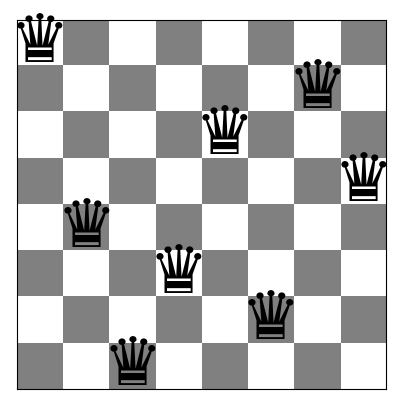

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


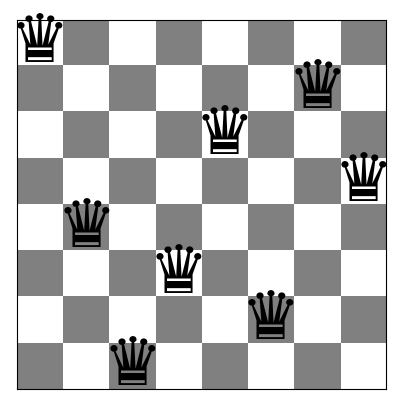

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.1533482074737549 seconds

Ending 0 run
Time: 1.1537978649139404
#######################################################################################

#######################################################################################
Starting run 2 for <function dfs_8Q at 0x7d98841e9120>


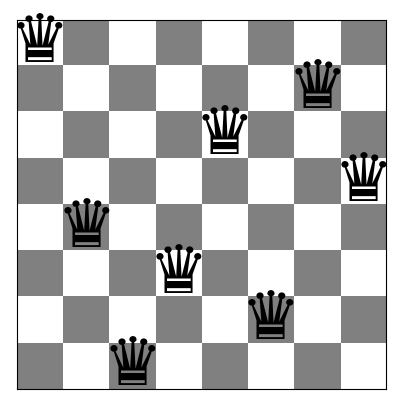

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


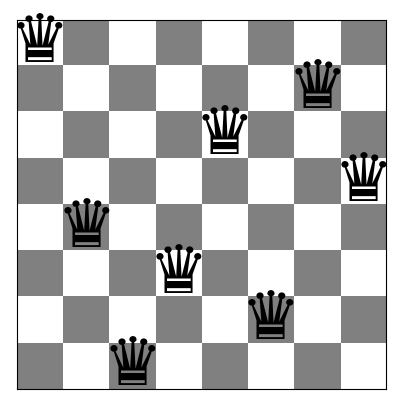

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


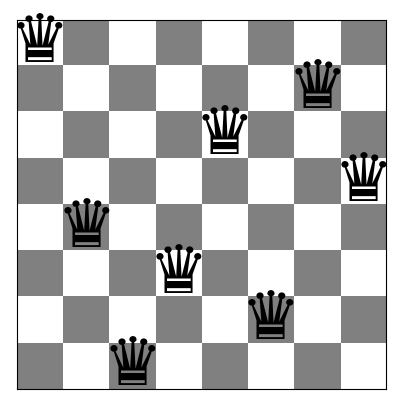

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


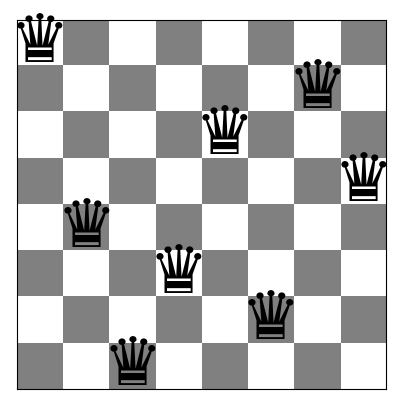

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


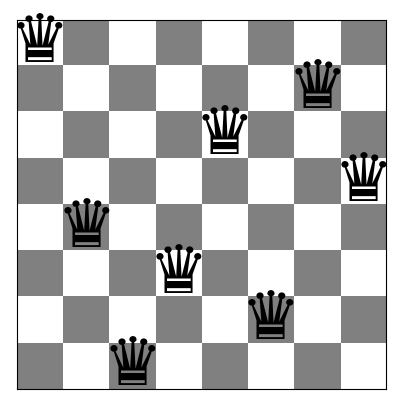

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


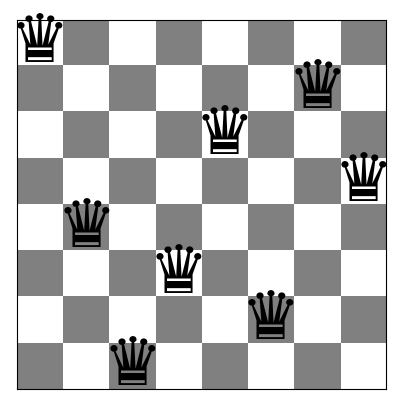

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


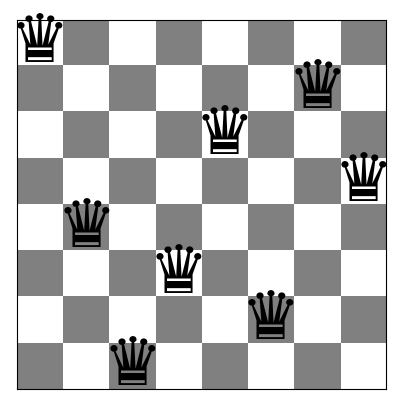

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


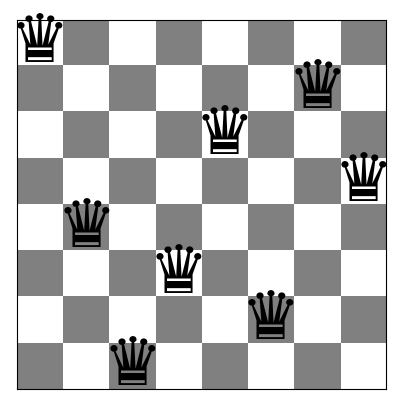

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.582815170288086 seconds

Ending 1 run
Time: 1.583225965499878
#######################################################################################

#######################################################################################
Starting run 3 for <function dfs_8Q at 0x7d98841e9120>


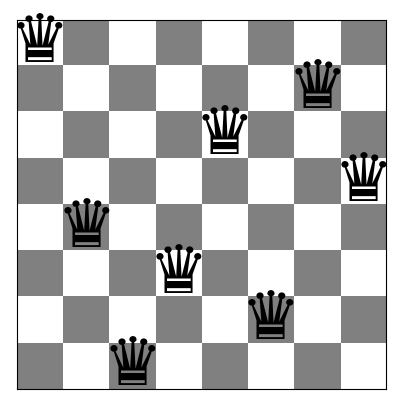

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


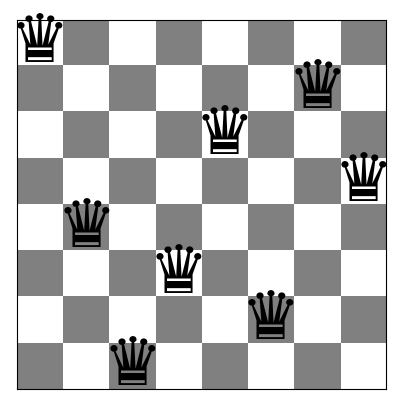

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


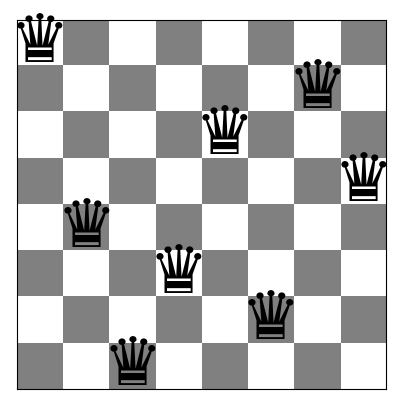

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


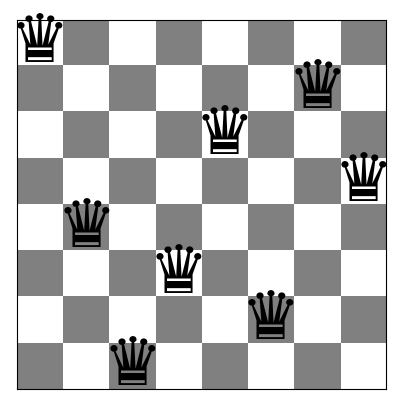

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


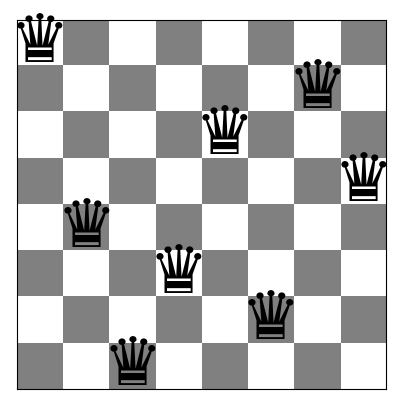

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


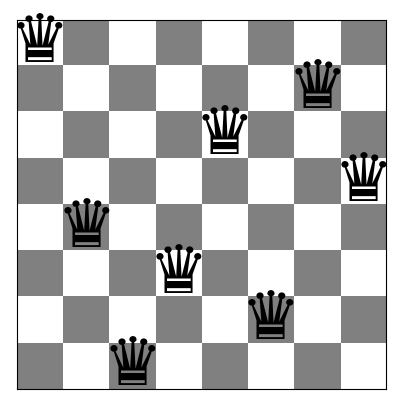

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


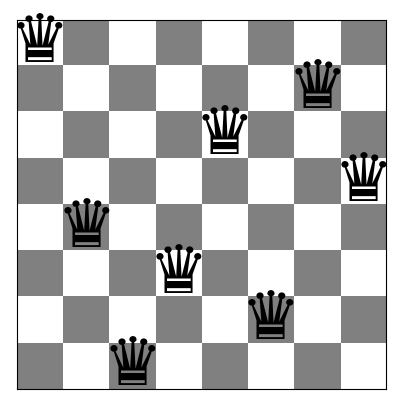

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


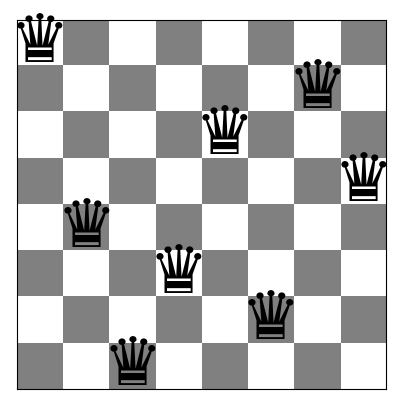

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.5512945652008057 seconds

Ending 2 run
Time: 1.5518834590911865
#######################################################################################

#######################################################################################
Starting run 4 for <function dfs_8Q at 0x7d98841e9120>


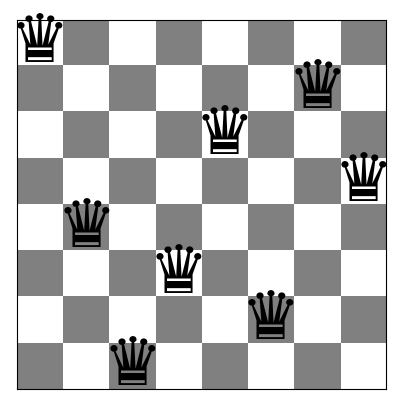

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


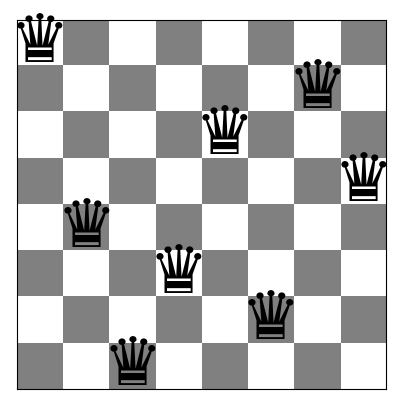

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


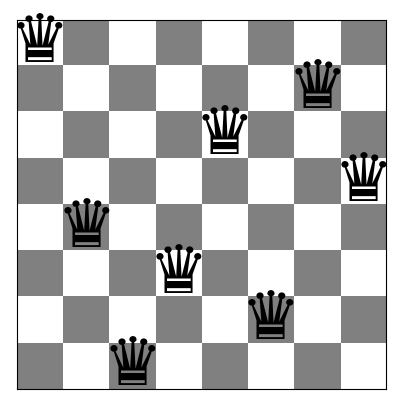

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


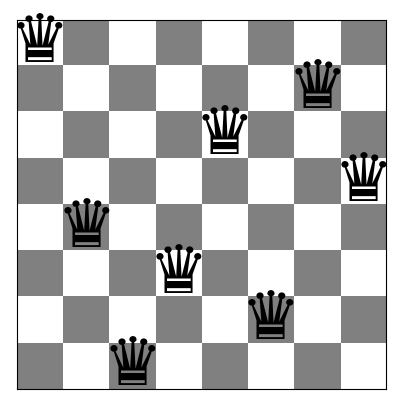

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


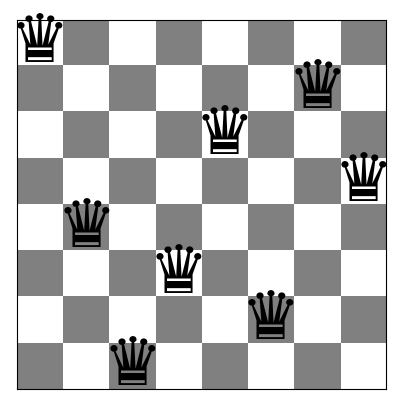

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


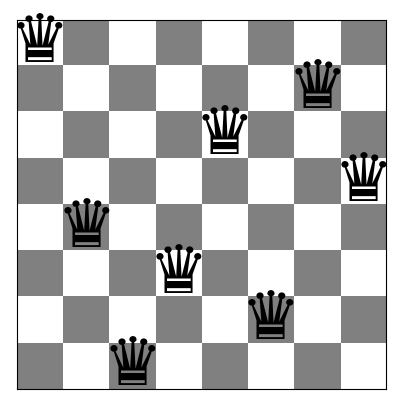

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


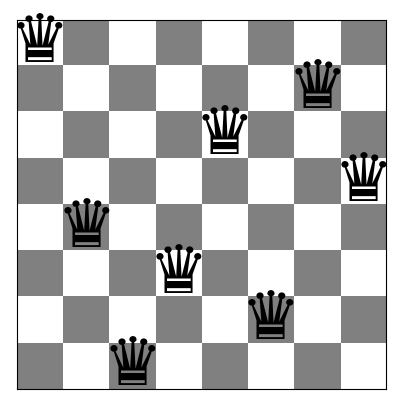

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


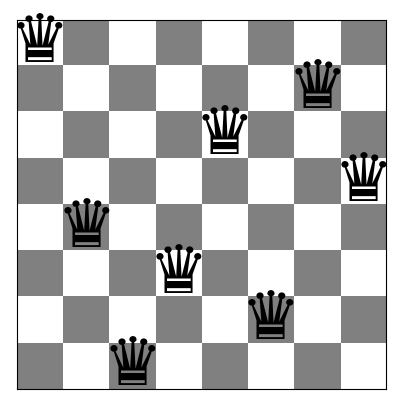

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.1280882358551025 seconds

Ending 3 run
Time: 1.1284890174865723
#######################################################################################

#######################################################################################
Starting run 5 for <function dfs_8Q at 0x7d98841e9120>


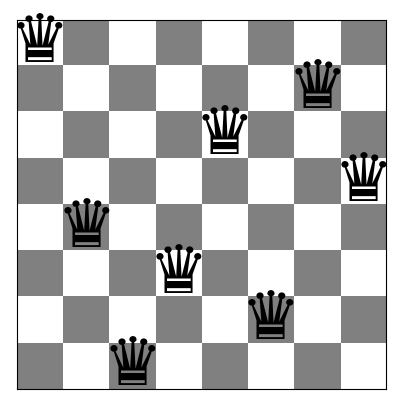

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


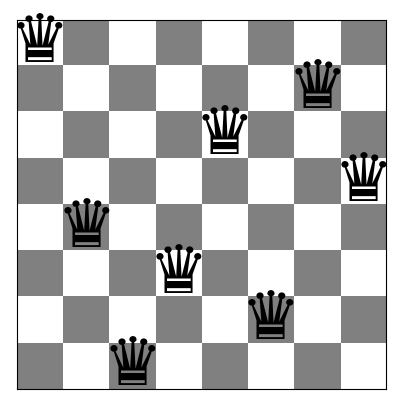

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


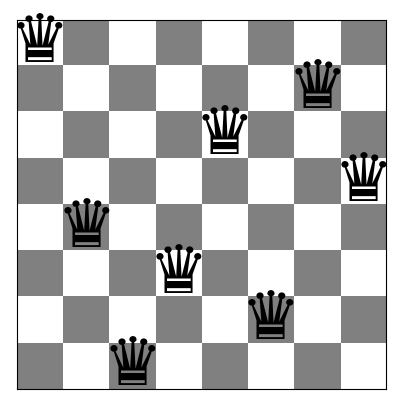

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


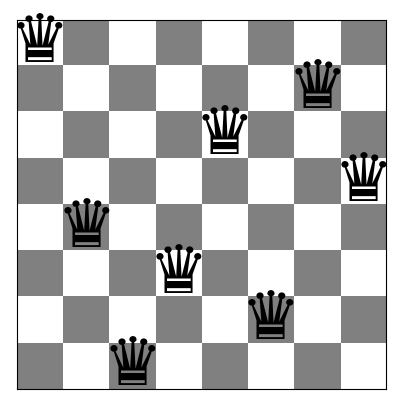

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


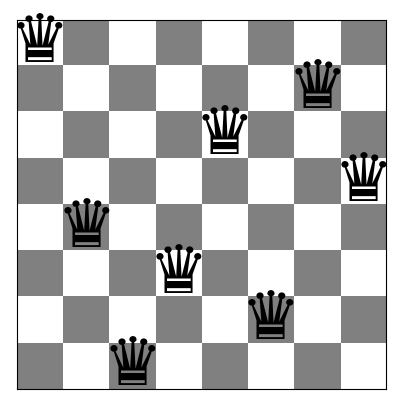

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


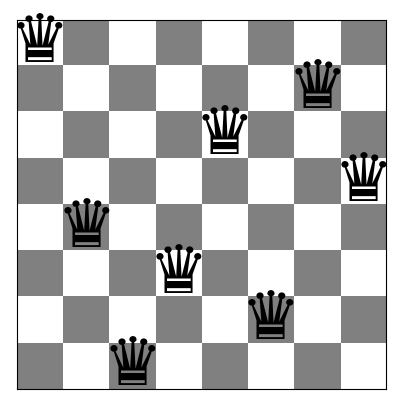

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


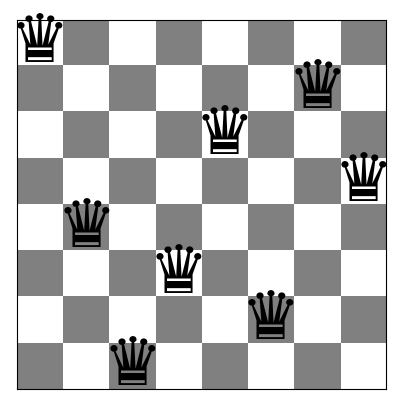

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


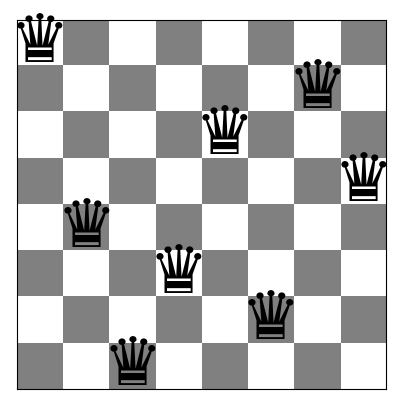

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.1607849597930908 seconds

Ending 4 run
Time: 1.161180019378662
#######################################################################################

#######################################################################################
Starting run 6 for <function dfs_8Q at 0x7d98841e9120>


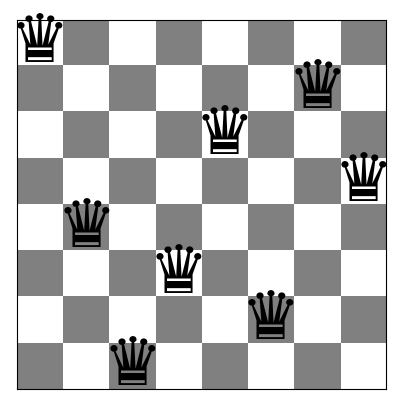

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


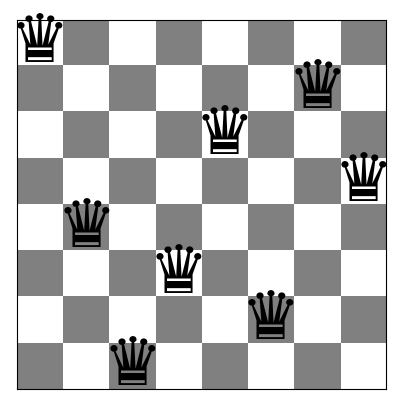

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


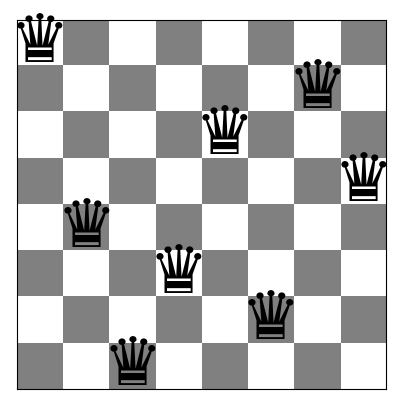

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


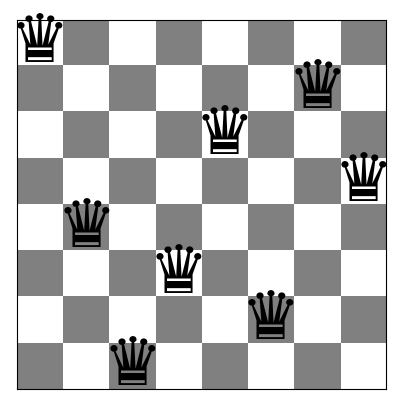

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


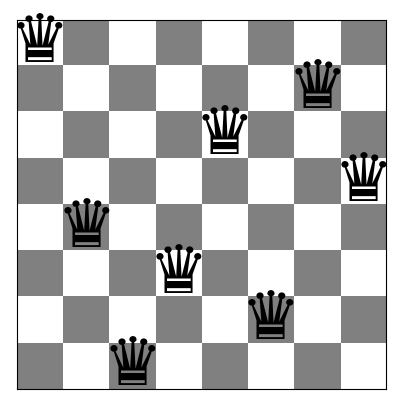

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


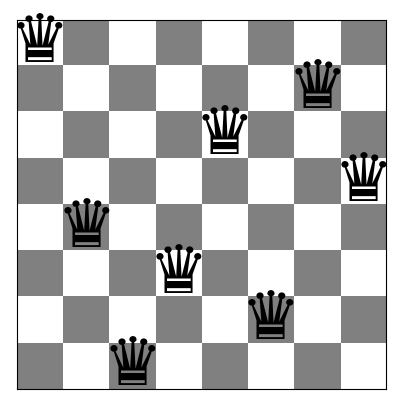

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


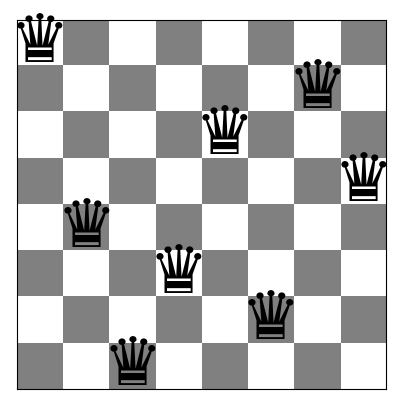

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


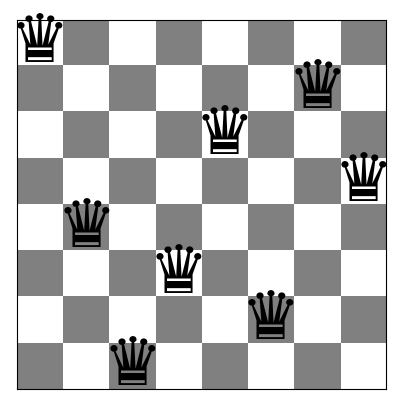

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.1126899719238281 seconds

Ending 5 run
Time: 1.1132676601409912
#######################################################################################

#######################################################################################
Starting run 7 for <function dfs_8Q at 0x7d98841e9120>


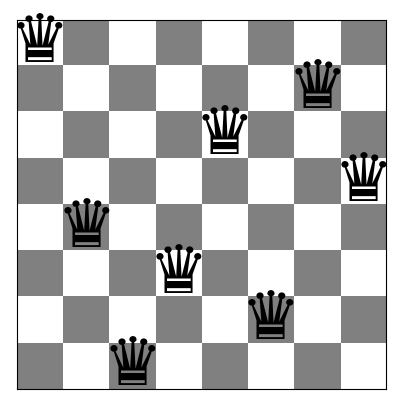

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


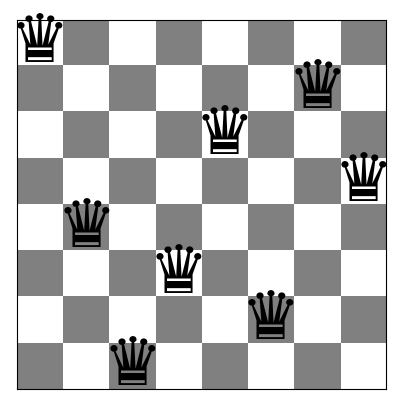

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


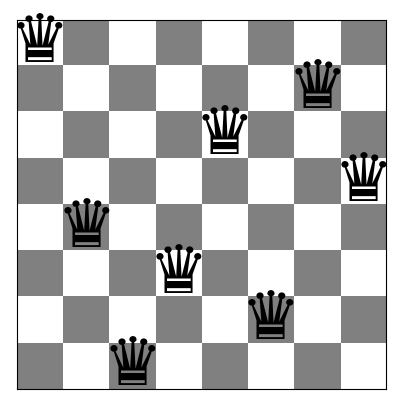

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


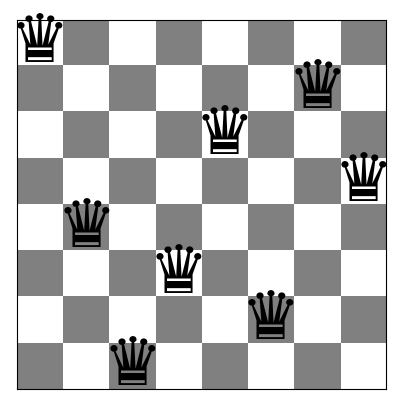

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


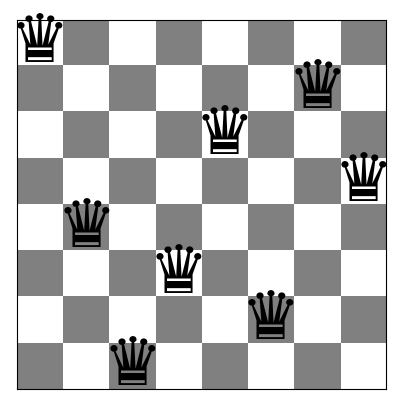

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


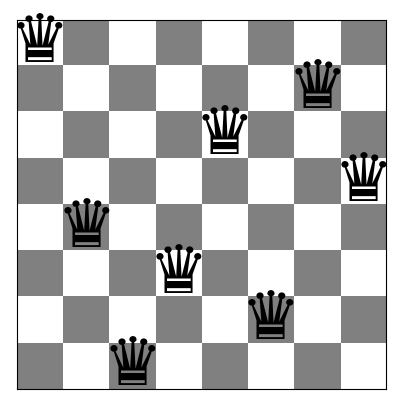

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


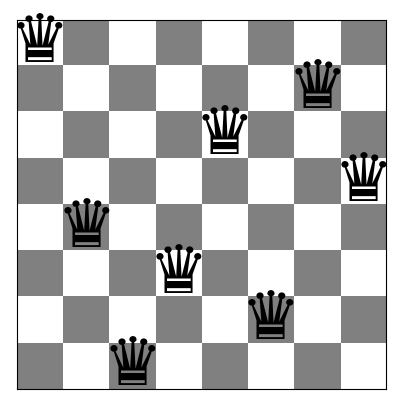

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


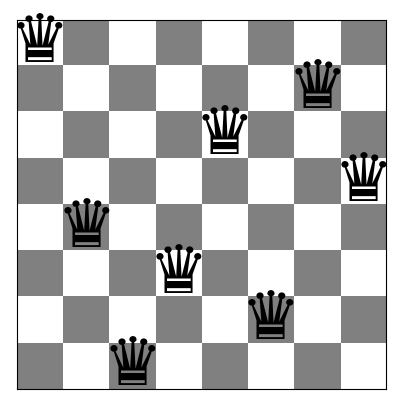

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.1362156867980957 seconds

Ending 6 run
Time: 1.136253833770752
#######################################################################################

#######################################################################################
Starting run 8 for <function dfs_8Q at 0x7d98841e9120>


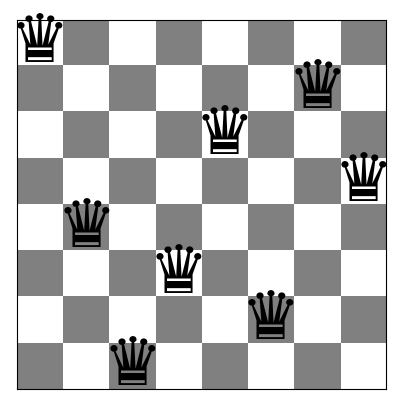

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


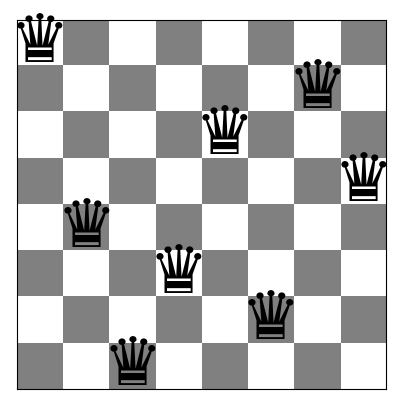

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


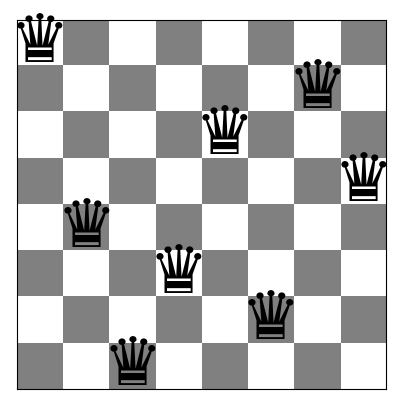

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


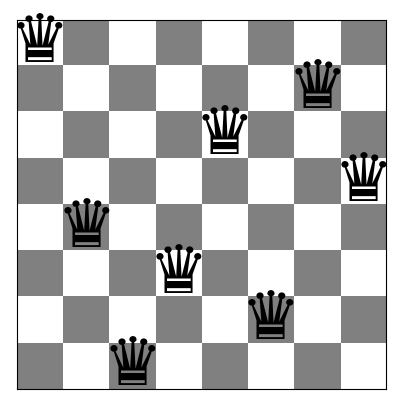

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


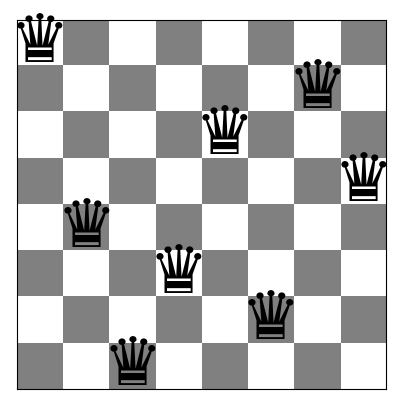

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


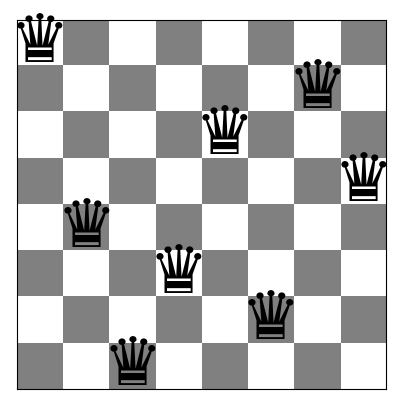

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


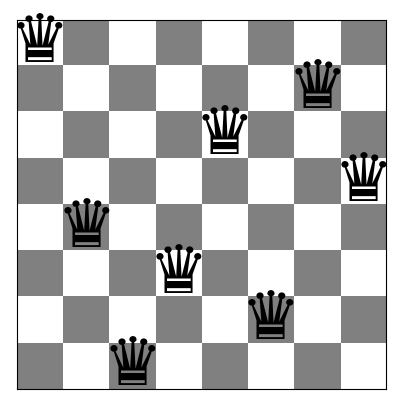

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


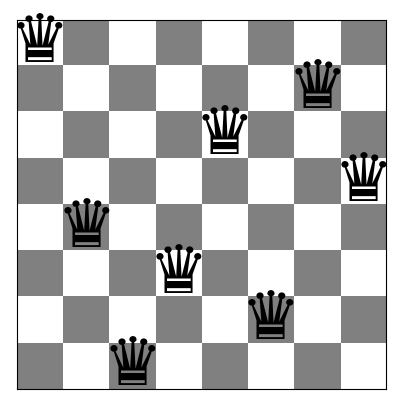

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.1239161491394043 seconds

Ending 7 run
Time: 1.1251795291900635
#######################################################################################

#######################################################################################
Starting run 9 for <function dfs_8Q at 0x7d98841e9120>


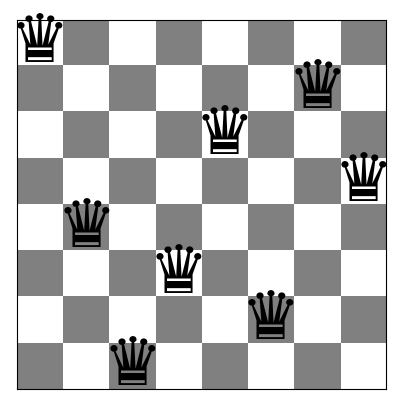

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


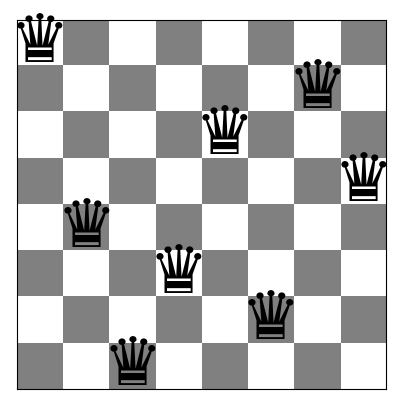

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


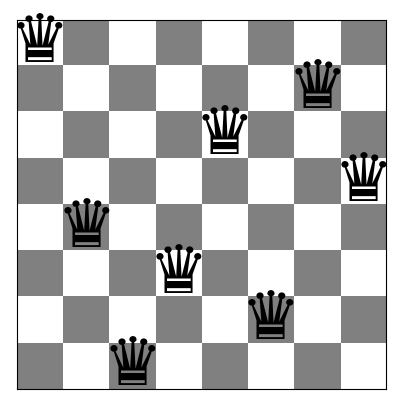

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


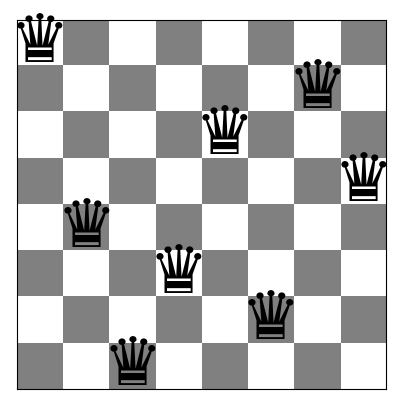

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


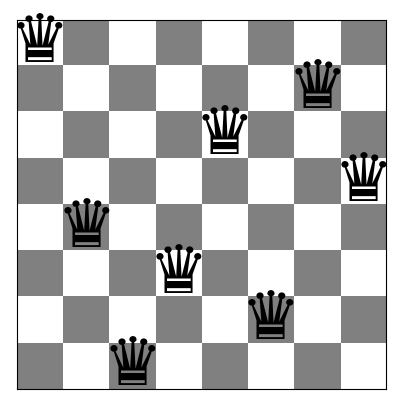

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


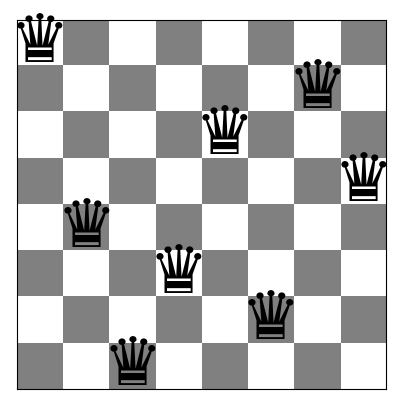

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


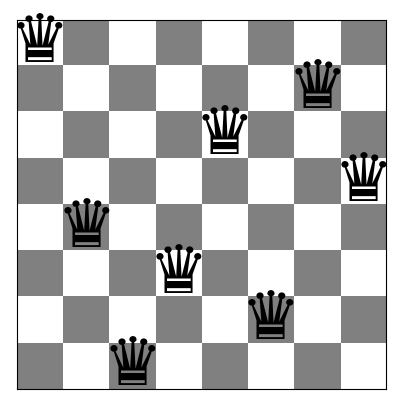

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


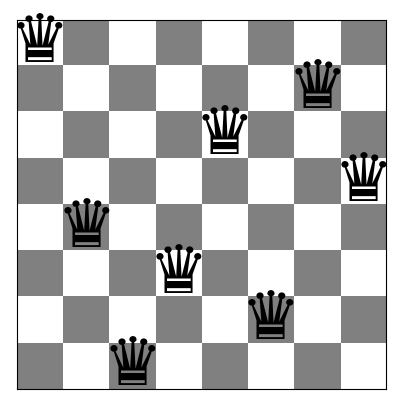

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.153580904006958 seconds

Ending 8 run
Time: 1.153989315032959
#######################################################################################

#######################################################################################
Starting run 10 for <function dfs_8Q at 0x7d98841e9120>


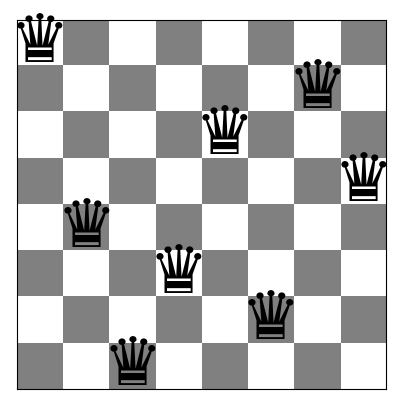

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


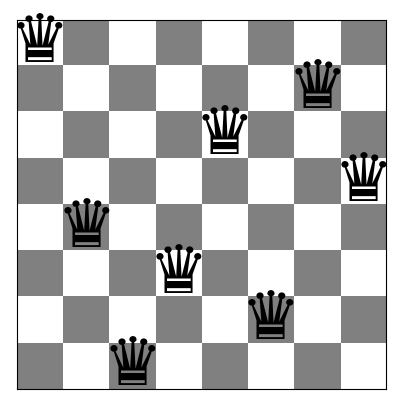

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


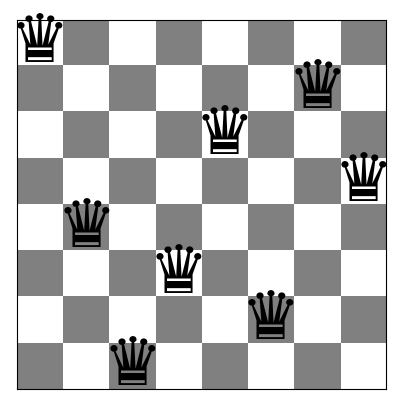

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


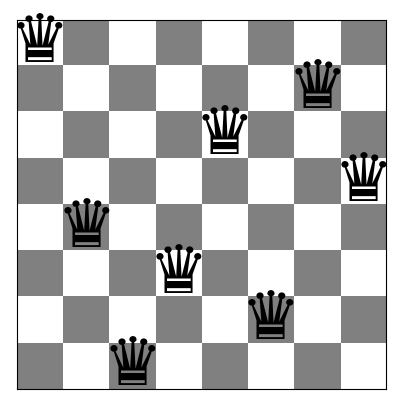

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


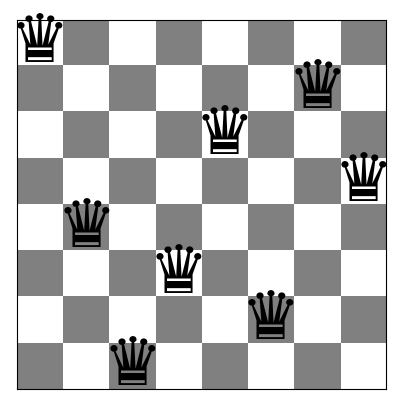

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


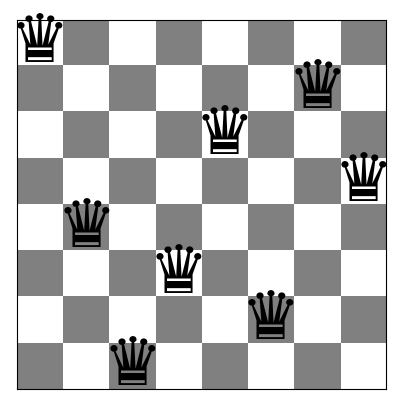

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


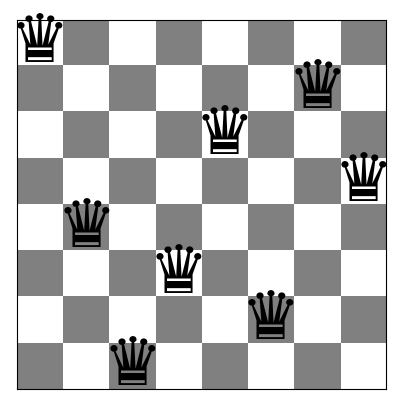

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0


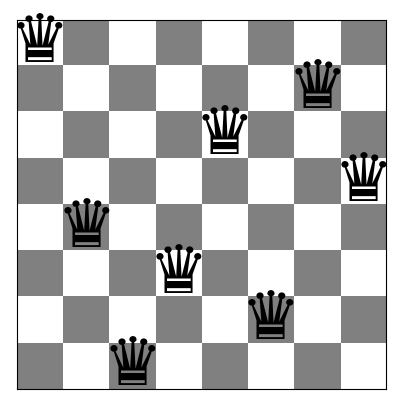

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
attacks: 0
Time taken to solve: 1.3437585830688477 seconds

Ending 9 run
Time: 1.3443365097045898
#######################################################################################

#######################################################################################




In [ ]:
board_size = 8
simulated_annealing_results = run_experiment(dfs_8Q, board_size, 'DFS')

In [ ]:
print('HC version\t\tboard size\tavg run time')
print(f'Simulated Annealing\t{board_size}\t\t{simulated_annealing_results[0]:.5f}')


HC version		board size	avg run time
Simulated Annealing	8		1.24516


In [8]:
def dfs_8Q():
    def valid(queen_positions, i, j):
        for row in range(i):
            col = queen_positions[row]
            if col == j or \
               col - row == j - i or \
               col + row == j + i:
                return False
        return True

    def place_queen(n, queen_positions, row):
        if row == n:
            for r in range(n):
                line = "".join("Q " if queen_positions[r] == c else ". " for c in range(n))
                # print_board(queen_positions)
                # print(line)
            # print("\n")
            return True
        for col in range(n):
            if valid(queen_positions, row, col):
                queen_positions[row] = col
                if place_queen(n, queen_positions, row + 1):
                    return True
        return False
    start_time = time.time()
    if not place_queen(8, [-1] * 8, 0):
        print("No solution found.")
    end_time = time.time()
    print(f"Time taken to solve: {end_time - start_time} seconds")


start_time = time.time()
tracemalloc.start()
snapshot1 = tracemalloc.take_snapshot()#Taking a snapshot before solving
dfs_8Q()
snapshot2 = tracemalloc.take_snapshot()#Taking the final snapshot
tracemalloc.stop()
top_stats = snapshot2.compare_to(snapshot1,'lineno')#Calculating the memmory usage
memory = top_stats[0].size_diff / 1024
print('Memory Usage:', memory,'KB')


Time taken to solve: 0.003142833709716797 seconds
Memory Usage: 1.9375 KB
